In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/gdrive')
path = '/content/gdrive/My Drive/Colab Notebooks/ecg_project/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#!pip install ecg-plot

In [ ]:
#!pip install tensorflow_addons

In [ ]:
#!pip install wfdb

In [ ]:
#!pip install keras

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import ecg_plot
import seaborn as sns
import math
from scipy.io import loadmat

Приведем пример визуализации ЭКГ

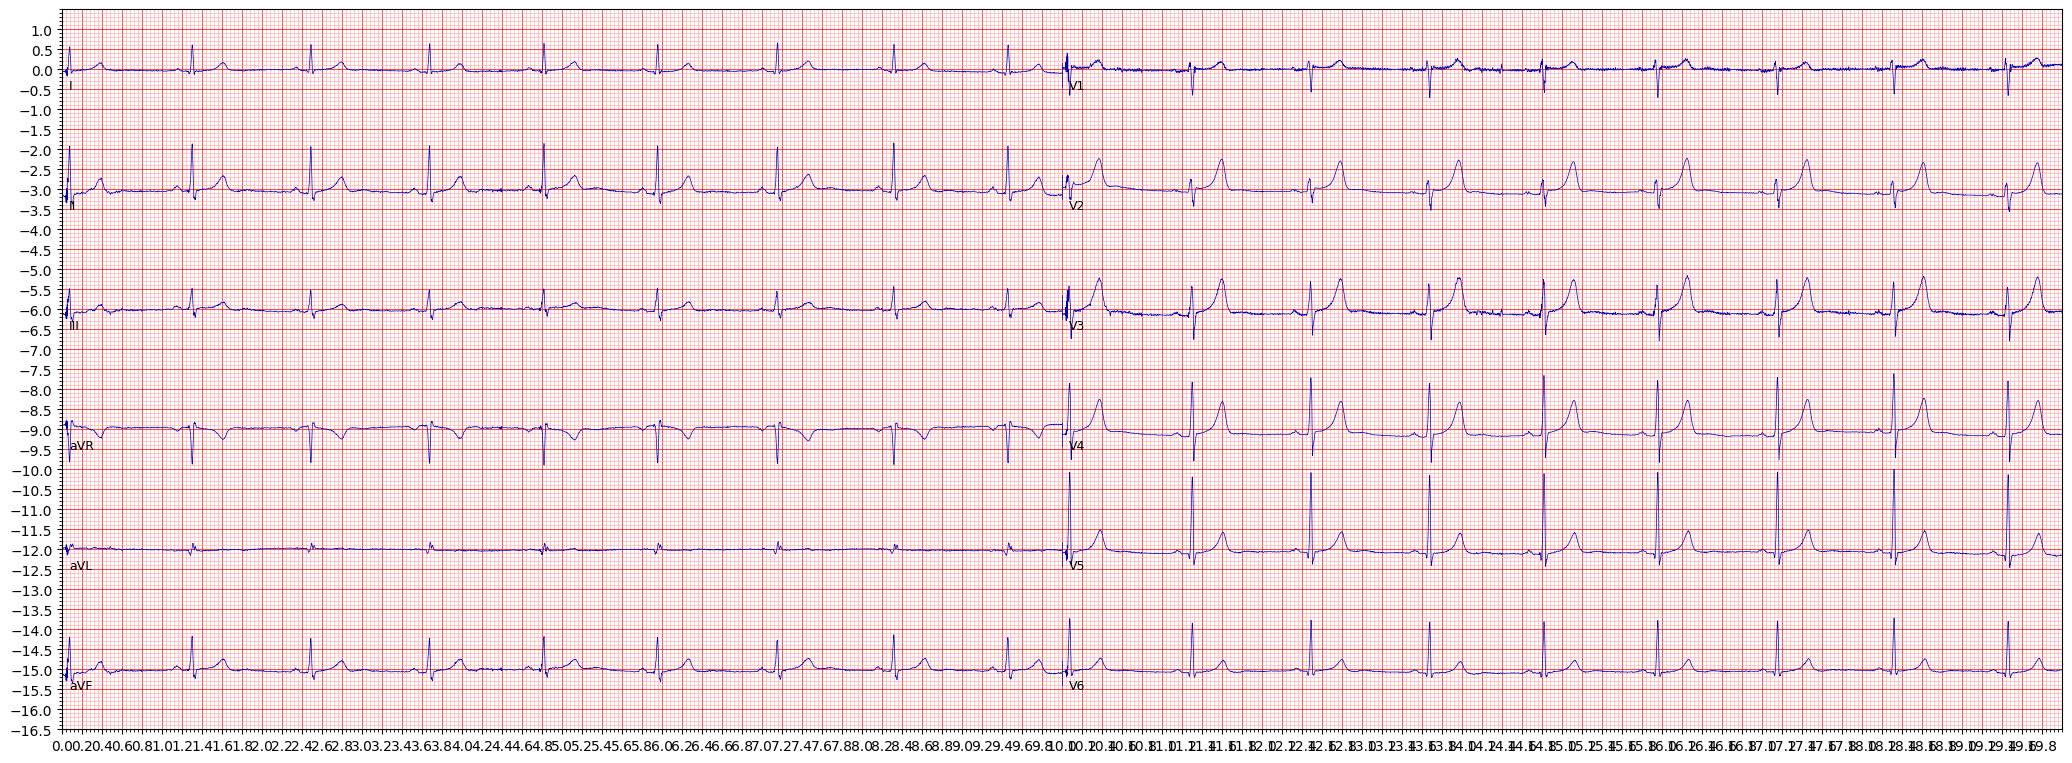

In [ ]:
def load_challenge_data(filename):
    x = loadmat(filename)
    data = np.asarray(x['val'], dtype=np.float64)
    new_file = filename.replace('.mat','.hea')
    input_header_file = os.path.join(new_file)
    with open(input_header_file,'r') as f:
        header_data=f.readlines()
    return data, header_data

def plot_ecg(path):
    ecg_data = load_challenge_data(path)
    ecg_plot.plot(ecg_data[0]/1000, sample_rate=500, title='')
    ecg_plot.show()


plot_ecg("/content/gdrive/My Drive/Colab Notebooks/ecg_project/Georgia/E08807.mat")

Выведем текстовую информацию о файле ЭКГ

In [ ]:
path = "/content/gdrive/My Drive/Colab Notebooks/ecg_project/Georgia/E08807.mat"

ecg_data = load_challenge_data("/content/gdrive/My Drive/Colab Notebooks/ecg_project/Georgia/E08807.mat")

In [ ]:
ecg_data

(array([[ -63.,  -68.,  -68., ...,  -92.,  -92., -102.],
        [-170., -175., -175., ..., -141., -136., -141.],
        [-107., -107., -107., ...,  -48.,  -43.,  -39.],
        ...,
        [-122., -122., -122., ..., -131., -131., -126.],
        [ -82.,  -82.,  -82., ..., -151., -146., -146.],
        [ -58.,  -58.,  -58., ...,  -14.,   -9.,  -19.]]),
 ['E08807.mat 12 500 5000 05-May-2020 09:49:17\n',
  'E08807.mat 16+24 4880/mV 16 0 -63 -32536 0 I\n',
  'E08807.mat 16+24 4880/mV 16 0 -170 22017 0 II\n',
  'E08807.mat 16+24 4880/mV 16 0 -107 -10555 0 III\n',
  'E08807.mat 16+24 4880/mV 16 0 117 5280 0 aVR\n',
  'E08807.mat 16+24 4880/mV 16 0 21 22092 0 aVL\n',
  'E08807.mat 16+24 4880/mV 16 0 -139 -26758 0 aVF\n',
  'E08807.mat 16+24 4880/mV 16 0 48 22171 0 V1\n',
  'E08807.mat 16+24 4880/mV 16 0 53 8775 0 V2\n',
  'E08807.mat 16+24 4880/mV 16 0 -107 8001 0 V3\n',
  'E08807.mat 16+24 4880/mV 16 0 -122 243 0 V4\n',
  'E08807.mat 16+24 4880/mV 16 0 -82 -9979 0 V5\n',
  'E08807.mat 16+

Сборка датасета

In [ ]:
path_to_matfiles = "/content/gdrive/My Drive/Colab Notebooks/ecg_project/Georgia/"

In [ ]:
def import_key_data(path):
    signal = []
    id = []
    time = []
    prefix = []
    one = []
    two = []
    three = []
    aVR = []
    aVL = []
    aVF = []
    V1 = []
    V2 = []
    V3 = []
    V4 = []
    V5 = []
    V6 = []
    age = []
    gender = []
    labels = []
    ecg_filenames = []
    r = []
    h = []
    x = []
    for subdir, dirs, files in sorted(os.walk(path)):
        for filename in files:
            filepath = subdir + os.sep + filename
            if filepath.endswith(".mat"):
                data, header_data = load_challenge_data(filepath)

                signal.append(data)

                if len(header_data[0][:-1]) > 0:
                    id.append(header_data[0][0:6])
                else:
                    id.append(np.nan)

                if len(header_data[0][:-1]) > 0:
                    time.append(header_data[0][11:-1])
                else:
                    time.append(np.nan)

                if len(header_data[1][:-1]) > 0:
                    prefix.append(header_data[1][11:29])
                else:
                    prefix.append(np.nan)

                if len(header_data[1][:-1]) > 0:
                    one.append(header_data[1][29:-1].replace(' I', ''))
                else:
                    one.append(np.nan)

                if len(header_data[2][:-1]) > 0:
                    two.append(header_data[2][29:-1].replace(' II', ''))
                else:
                    two.append(np.nan)

                if len(header_data[3][:-1]) > 0:
                    three.append(header_data[3][29:-1].replace(' III', ''))
                else:
                    three.append(np.nan)

                if len(header_data[4][:-1]) > 0:
                    aVR.append(header_data[4][29:-1].replace(' aVR', ''))
                else:
                    aVR.append(np.nan)

                if len(header_data[5][:-1]) > 0:
                    aVL.append(header_data[5][29:-1].replace(' aVL', ''))
                else:
                    aVL.append(np.nan)

                if len(header_data[6][:-1]) > 0:
                    aVF.append(header_data[6][29:-1].replace(' aVF', ''))
                else:
                    aVF.append(np.nan)

                if len(header_data[7][:-1]) > 0:
                    V1.append(header_data[7][29:-1].replace(' V1', ''))
                else:
                    V1.append(np.nan)

                if len(header_data[8][:-1]) > 0:
                    V2.append(header_data[8][29:-1].replace(' V2', ''))
                else:
                    V2.append(np.nan)

                if len(header_data[9][:-1]) > 0:
                    V3.append(header_data[9][29:-1].replace(' V3', ''))
                else:
                    V3.append(np.nan)

                if len(header_data[10][:-1]) > 0:
                    V4.append(header_data[10][29:-1].replace(' V4', ''))
                else:
                    V4.append(np.nan)

                if len(header_data[11][:-1]) > 0:
                    V5.append(header_data[11][29:-1].replace(' V5', ''))
                else:
                    V5.append(np.nan)

                if len(header_data[12][:-1]) > 0:
                    V6.append(header_data[12][29:-1].replace(' V6', ''))
                else:
                    V6.append(np.nan)

                if len(header_data[15][5:-1]) > 0:
                    labels.append(header_data[15][5:-1])
                else:
                    labels.append(np.nan)

                ecg_filenames.append(filepath)

                if len(header_data[14][6:-1]) > 0:
                    gender.append(header_data[14][6:-1])
                else:
                    gender.append(np.nan)

                if len(header_data[13][6:-1]) > 0:
                    age.append(header_data[13][6:-1])
                else:
                    age.append(np.nan)

                if len(header_data[16][:-1].split(' ')[1]) > 0:
                    r.append(header_data[16][:-1].split(' ')[1])
                else:
                    r.append(np.nan)

                if len(header_data[17][:-1].split(' ')[1]) > 0:
                    h.append(header_data[17][:-1].split(' ')[1])
                else:
                    h.append(np.nan)

                if len(header_data[18][:-1].split(' ')[1]) > 0:
                    x.append(header_data[18][:-1].split(' ')[1])
                else:
                    x.append(np.nan)

    return signal, id, time, prefix, one, two, three, aVR, aVL, aVF, V1, V2, V3, V4, V5, V6, gender, age, labels, ecg_filenames, r, h, x

In [ ]:
signal, id, time, prefix, one, two, three, aVR, aVL, aVF, V1, V2, V3, V4, V5, V6, gender, age, labels, ecg_filenames, r, h, x = import_key_data(path_to_matfiles)

In [ ]:
df = pd.DataFrame(
    {
        'id' : id,
        'time': time,
        'prefix': prefix,
        'one': one,
        'two': two,
        'three': three,
        'aVR': aVR,
        'aVL': aVL,
        'aVF': aVF,
        'V1': V1,
        'V2': V2,
        'V3': V3,
        'V4': V4,
        'V5': V5,
        'V6': V6,
        'gender': gender,
        'age': age,
        'labels': labels,
        'signal' : signal,
        'ecg_filename': ecg_filenames,
        'r': r,
        'h': h,
        'x': x
    }
)

In [ ]:
df.head()

,id,time,prefix,one,two,three,aVR,aVL,aVF,V1,...,V5,V6,gender,age,labels,signal,ecg_filename,r,h,x
0,E09826,12 500 5000 30-Apr-2020 10:08:39,16+24 4880/mV 16 0,53 -5098 0,39 -4588 0,-14 1157 0,-46 -28005 0,34 -3019 0,12 31042 0,-63 28552 0,...,48 32763 0,24 25363 0,Female,49,"67741000119109,111975006,164934002","[[53.0, 112.0, 122.0, 122.0, 117.0, 117.0, 117...",/content/gdrive/My Drive/Colab Notebooks/ecg_p...,Unknown,Unknown,Unknown
1,E09837,12 500 5000 30-Apr-2020 10:08:39,16+24 4880/mV 16 0,-39 -23882 0,-156 14575 0,-117 -26631 0,97 4741 0,39 877 0,-136 -6047 0,-19 -19032 0,...,-117 -28996 0,-107 -27383 0,Male,64,"164890007,233917008","[[-39.0, -39.0, -39.0, -39.0, -39.0, -39.0, -3...",/content/gdrive/My Drive/Colab Notebooks/ecg_p...,Unknown,Unknown,Unknown
2,E09758,12 500 5000 30-Apr-2020 10:08:39,16+24 4880/mV 16 0,-24 -17851 0,-19 10656 0,4 28175 0,21 3656 0,-14 -22806 0,-7 19344 0,48 27433 0,...,-78 25545 0,224 26910 0,Male,67,"425623009,164934002,17338001","[[-24.0, -24.0, -24.0, -24.0, -24.0, -24.0, -2...",/content/gdrive/My Drive/Colab Notebooks/ecg_p...,Unknown,Unknown,Unknown
3,E09872,12 500 5000 18-May-2020 12:48:52,16+24 4880/mV 16 0,-19 17474 0,-63 -22995 0,-43 25123 0,41 -30015 0,12 29487 0,-53 1310 0,4 -8821 0,...,-58 18998 0,-43 -11849 0,Female,21,"251146004,427393009","[[-19.0, -19.0, -19.0, -34.0, -39.0, -43.0, -5...",/content/gdrive/My Drive/Colab Notebooks/ecg_p...,Unknown,Unknown,Unknown
4,E09724,12 500 5000 30-Apr-2020 10:08:39,16+24 4880/mV 16 0,-429 -18051 0,107 28498 0,536 -18725 0,161 -5133 0,-483 368 0,322 5030 0,224 -19003 0,...,-97 21569 0,-39 -22268 0,Male,66,"428750005,59118001,164934002,427084000,59931005","[[-429.0, -429.0, -429.0, -429.0, -448.0, -458...",/content/gdrive/My Drive/Colab Notebooks/ecg_p...,Unknown,Unknown,Unknown


Рассмотрим колонки, где возможны повторы значений

In [ ]:
df['time'].unique()

array(['12 500 5000 30-Apr-2020 10:08:39',
       '12 500 5000 18-May-2020 12:48:52',
       '12 500 5000 08-May-2020 17:27:33',
       '12 500 5000 18-May-2020 12:20:18',
       '12 500 2500 08-May-2020 17:27:33',
       '12 500 5000 01-Jun-2020 15:51:33',
       '12 500 5000 02-Jun-2020 09:41:08',
       '12 500 2500 02-Jun-2020 09:41:08',
       '12 500 5000 08-May-2020 10:33:24',
       '12 500 5000 05-May-2020 09:49:17',
       '12 500 2500 05-May-2020 09:49:17',
       '12 500 5000 05-May-2020 14:50:55',
       '12 500 2500 05-May-2020 14:50:55',
       '12 500 5000 08-May-2020 10:42:10'], dtype=object)

In [ ]:
df['prefix'].unique()

array(['16+24 4880/mV 16 0'], dtype=object)

Видим, что префикс идентичен у всех записей

Посмотрим на структуру сигнала

In [ ]:
with np.printoptions(threshold=np.inf):
    print(len(df['signal'][0]))

12


In [ ]:
with np.printoptions(threshold=np.inf):
    print(len(df['signal'][0][0]))

5000


In [ ]:
with np.printoptions(threshold=np.inf):
    print(sum(df['signal'][0][0]))

60438.0


Убедились в том, что нет сведений о втором значении в каждом из 12 отведений - было предположение, что это значений сумма точек на графике. Можем оставить только первое значение в каждом отведении.

In [ ]:
df2 = df.drop(['time', 'prefix'], axis=1)
col_names = ['one',
             'two',
             'three',
             'aVR',
             'aVL',
             'aVF',
             'V1',
             'V2',
             'V3',
             'V4',
             'V5',
             'V6']

for col_name in col_names:
    info_first = []
    for el in df[col_name]:
        first_value, second_value, third_value = map(int, el.split())
        info_first.append(first_value)
    df2[f'{col_name}'] = info_first

#df2 = df2.drop(col_names, axis=1)

df2 = df2.drop(['r', 'h', 'x'], axis=1) # Всегда unknown

df2['labels'] = df2['labels'].apply(lambda x: list(map(int, x.split(','))))

df2['labels'] = df2['labels'].apply(lambda x: list(set(x)) if isinstance(x, list) else x) # удаление дубликатов

df2 = df2.drop(columns={'ecg_filename'})

df2

,id,one,two,three,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6,gender,age,labels,signal
0,E09826,53,39,-14,-46,34,12,-63,39,53,43,48,24,Female,49,"[164934002, 67741000119109, 111975006]","[[53.0, 112.0, 122.0, 122.0, 117.0, 117.0, 117..."
1,E09837,-39,-156,-117,97,39,-136,-19,19,-156,-204,-117,-107,Male,64,"[233917008, 164890007]","[[-39.0, -39.0, -39.0, -39.0, -39.0, -39.0, -3..."
2,E09758,-24,-19,4,21,-14,-7,48,19,53,0,-78,224,Male,67,"[425623009, 164934002, 17338001]","[[-24.0, -24.0, -24.0, -24.0, -24.0, -24.0, -2..."
3,E09872,-19,-63,-43,41,12,-53,4,48,43,-278,-58,-43,Female,21,"[427393009, 251146004]","[[-19.0, -19.0, -19.0, -34.0, -39.0, -43.0, -5..."
4,E09724,-429,107,536,161,-483,322,224,-175,156,-107,-97,-39,Male,66,"[427084000, 59118001, 164934002, 428750005, 59...","[[-429.0, -429.0, -429.0, -429.0, -448.0, -458..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10344,E00241,-53,102,156,-24,-104,129,-53,-97,-58,-53,-82,-53,Female,47,[253352002],"[[-53.0, -68.0, -78.0, -87.0, -87.0, -102.0, -..."
10345,E00307,43,131,87,-87,-21,109,0,53,34,48,24,14,Female,69,"[427084000, 284470004]","[[43.0, 34.0, 29.0, 24.0, 24.0, 9.0, 0.0, 0.0,..."
10346,E00250,-78,175,253,-48,-165,214,9,-78,97,68,-9,-29,Female,30,[164873001],"[[-78.0, -78.0, -78.0, -78.0, -87.0, -87.0, -8..."
10347,E00249,19,-48,-68,14,43,-58,29,48,-9,-68,-97,-68,Female,73,[426783006],"[[19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19..."


In [ ]:
df_exploded = df2.explode('labels', ignore_index=True) # разворачиваем список с заболеваниями для анализа данных

In [ ]:
df_exploded.head()

,id,one,two,three,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6,gender,age,labels,signal
0,E09826,53,39,-14,-46,34,12,-63,39,53,43,48,24,Female,49,164934002,"[[53.0, 112.0, 122.0, 122.0, 117.0, 117.0, 117..."
1,E09826,53,39,-14,-46,34,12,-63,39,53,43,48,24,Female,49,67741000119109,"[[53.0, 112.0, 122.0, 122.0, 117.0, 117.0, 117..."
2,E09826,53,39,-14,-46,34,12,-63,39,53,43,48,24,Female,49,111975006,"[[53.0, 112.0, 122.0, 122.0, 117.0, 117.0, 117..."
3,E09837,-39,-156,-117,97,39,-136,-19,19,-156,-204,-117,-107,Male,64,233917008,"[[-39.0, -39.0, -39.0, -39.0, -39.0, -39.0, -3..."
4,E09837,-39,-156,-117,97,39,-136,-19,19,-156,-204,-117,-107,Male,64,164890007,"[[-39.0, -39.0, -39.0, -39.0, -39.0, -39.0, -3..."


Добавим расшифровки заболеваний к их id'шникам

In [ ]:
#SNOMED CT is one of a suite of designated standards for use in U.S. Federal Government systems for the electronic exchange of clinical health information and is also a required standard in interoperability specifications of the U.S. Healthcare Information Technology Standards Panel.

path = '/content/gdrive/My Drive/Colab Notebooks/ecg_project/'

df_diseases = pd.read_csv(path + 'snomed-ct.csv', sep=',')

df_diseases_code = df_diseases.rename(columns={'Dx':'disease_name', 'SNOMED CT Code':'labels', 'Abbreviation':'short_disease_name'})

In [ ]:
df_diseases_code

,disease_name,labels,short_disease_name
0,1st degree av block,270492004,IAVB
1,2nd degree av block,195042002,IIAVB
2,abnormal QRS,164951009,abQRS
3,accelerated junctional rhythm,426664006,AJR
4,acute myocardial infarction,57054005,AMI
...,...,...,...
106,ventricular pre excitation,195060002,VPEx
107,ventricular tachycardia,164895002,VTach
108,ventricular trigeminy,251180001,VTrig
109,wandering atrial pacemaker,195101003,WAP


In [ ]:
df_exploded = df_exploded.merge(df_diseases_code, how='left', on='labels')

In [ ]:
df_exploded.head()

,id,one,two,three,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6,gender,age,labels,signal,disease_name,short_disease_name
0,E09826,53,39,-14,-46,34,12,-63,39,53,43,48,24,Female,49,164934002,"[[53.0, 112.0, 122.0, 122.0, 117.0, 117.0, 117...",t wave abnormal,TAb
1,E09826,53,39,-14,-46,34,12,-63,39,53,43,48,24,Female,49,67741000119109,"[[53.0, 112.0, 122.0, 122.0, 117.0, 117.0, 117...",left atrial enlargement,LAE
2,E09826,53,39,-14,-46,34,12,-63,39,53,43,48,24,Female,49,111975006,"[[53.0, 112.0, 122.0, 122.0, 117.0, 117.0, 117...",prolonged qt interval,LQT
3,E09837,-39,-156,-117,97,39,-136,-19,19,-156,-204,-117,-107,Male,64,233917008,"[[-39.0, -39.0, -39.0, -39.0, -39.0, -39.0, -3...",av block,AVB
4,E09837,-39,-156,-117,97,39,-136,-19,19,-156,-204,-117,-107,Male,64,164890007,"[[-39.0, -39.0, -39.0, -39.0, -39.0, -39.0, -3...",atrial flutter,AFL


Проверим наличие пропущенных значений.

In [ ]:
df_exploded.isna().sum()

,0
id,0
one,0
two,0
three,0
aVR,0
aVL,0
aVF,0
V1,0
V2,0
V3,0


In [ ]:
# наблюдаем 150 пропусков в колонке age

df_exploded.loc[:, df_exploded.columns != 'signal'].apply(lambda col: col.eq('NaN').sum())

,0
id,0
one,0
two,0
three,0
aVR,0
aVL,0
aVF,0
V1,0
V2,0
V3,0


Обработаем пропуски, заменив 'NaN' на медианное значение возраста отдельно для мужчин и отдельно для женщин.

In [ ]:
df_exploded['age'] = df_exploded['age'].replace({'NaN': 0, np.nan : 0})

In [ ]:
df_exploded.isna().sum()

,0
id,0
one,0
two,0
three,0
aVR,0
aVL,0
aVF,0
V1,0
V2,0
V3,0


In [ ]:
df_exploded[df_exploded.id == 'E09985']

,id,one,two,three,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6,gender,age,labels,signal,disease_name,short_disease_name
415,E09985,-1356,-1356,0,1356,-678,-678,185,-263,-146,78,-312,322,Male,0,164934002,"[[-1356.0, -1356.0, -1356.0, -1356.0, -1356.0,...",t wave abnormal,TAb
416,E09985,-1356,-1356,0,1356,-678,-678,185,-263,-146,78,-312,322,Male,0,164917005,"[[-1356.0, -1356.0, -1356.0, -1356.0, -1356.0,...",qwave abnormal,QAb


In [ ]:
df_exploded.age = df_exploded.age.apply(lambda x: int(x))

In [ ]:
median_value_male = df_exploded[(df_exploded.gender == 'Male') & (df_exploded.age != 0)]['age'].median()
df_exploded.loc[df_exploded.gender == 'Male', 'age'] = df_exploded.loc[df_exploded.gender == 'Male', 'age'].replace(0, median_value_male)

In [ ]:
median_value_female = df_exploded[(df_exploded.gender == 'Female') & (df_exploded.age != 0)]['age'].median()
df_exploded.loc[df_exploded.gender == 'Female', 'age'] = df_exploded.loc[df_exploded.gender == 'Female', 'age'].replace(0, median_value_male)

In [ ]:
df_exploded[df_exploded.id == 'E09985']

,id,one,two,three,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6,gender,age,labels,signal,disease_name,short_disease_name
415,E09985,-1356,-1356,0,1356,-678,-678,185,-263,-146,78,-312,322,Male,63,164934002,"[[-1356.0, -1356.0, -1356.0, -1356.0, -1356.0,...",t wave abnormal,TAb
416,E09985,-1356,-1356,0,1356,-678,-678,185,-263,-146,78,-312,322,Male,63,164917005,"[[-1356.0, -1356.0, -1356.0, -1356.0, -1356.0,...",qwave abnormal,QAb


Рассчитаем основные статистики для вещественных и категориальных признаков.

In [ ]:
df_exploded.describe()

,one,two,three,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6,age
count,23487.000000,23487.000000,23487.000000,23487.000000,23487.000000,23487.000000,23487.000000,23487.000000,23487.000000,23487.000000,23487.000000,23487.000000,23487.000000
mean,-6.400945,-4.766467,1.656108,5.567505,-4.014391,-1.552774,-3.319368,-4.419551,-4.603568,-3.068421,-0.966322,-5.566356,61.678035
std,162.170415,182.991012,173.544094,149.502459,140.807432,158.792423,240.414346,305.411841,352.627790,269.879454,240.545000,233.863944,15.204823
min,-1356.000000,-1586.000000,-1600.000000,-1605.000000,-976.000000,-1534.000000,-2879.000000,-4421.000000,-32768.000000,-7915.000000,-3611.000000,-3786.000000,14.000000
25%,-68.000000,-78.000000,-48.000000,-24.000000,-53.000000,-58.000000,-39.000000,-53.000000,-68.000000,-78.000000,-78.000000,-78.000000,52.000000
50%,-29.000000,-19.000000,0.000000,24.000000,-14.000000,-9.000000,14.000000,9.000000,0.000000,-9.000000,-29.000000,-29.000000,63.000000
75%,29.000000,39.000000,58.000000,65.000000,25.000000,43.000000,68.000000,78.000000,68.000000,58.000000,39.000000,29.000000,73.000000
max,1776.000000,2205.000000,2059.000000,1356.000000,1488.000000,2132.000000,4060.000000,2049.000000,2361.000000,2664.000000,3093.000000,4148.000000,116.000000


Посмотрим, каких заболеваний в датасете больше всего

In [ ]:
df_exploded.groupby(['disease_name', 'short_disease_name']).agg({'id':'nunique'}).sort_values(by='id', ascending=False)

,,id
disease_name,short_disease_name,
t wave abnormal,TAb,2306
nonspecific st t abnormality,NSSTTA,1883
sinus rhythm,SNR,1752
sinus bradycardia,SB,1677
prolonged qt interval,LQT,1391
...,...,...
shortened pr interval,SPRI,2
ventricular escape rhythm,VEsR,1
supraventricular premature beats,SVPB,1


In [ ]:
df_exploded.disease_name.nunique()

67

In [ ]:
df3 = df2.copy()

In [ ]:
df3['len_disease'] = df3['labels'].apply(lambda x: len(x))

In [ ]:
df3.head()

,id,one,two,three,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6,gender,age,labels,signal,len_disease
0,E09826,53,39,-14,-46,34,12,-63,39,53,43,48,24,Female,49,"[164934002, 67741000119109, 111975006]","[[53.0, 112.0, 122.0, 122.0, 117.0, 117.0, 117...",3
1,E09837,-39,-156,-117,97,39,-136,-19,19,-156,-204,-117,-107,Male,64,"[233917008, 164890007]","[[-39.0, -39.0, -39.0, -39.0, -39.0, -39.0, -3...",2
2,E09758,-24,-19,4,21,-14,-7,48,19,53,0,-78,224,Male,67,"[425623009, 164934002, 17338001]","[[-24.0, -24.0, -24.0, -24.0, -24.0, -24.0, -2...",3
3,E09872,-19,-63,-43,41,12,-53,4,48,43,-278,-58,-43,Female,21,"[427393009, 251146004]","[[-19.0, -19.0, -19.0, -34.0, -39.0, -43.0, -5...",2
4,E09724,-429,107,536,161,-483,322,224,-175,156,-107,-97,-39,Male,66,"[427084000, 59118001, 164934002, 428750005, 59...","[[-429.0, -429.0, -429.0, -429.0, -448.0, -458...",5


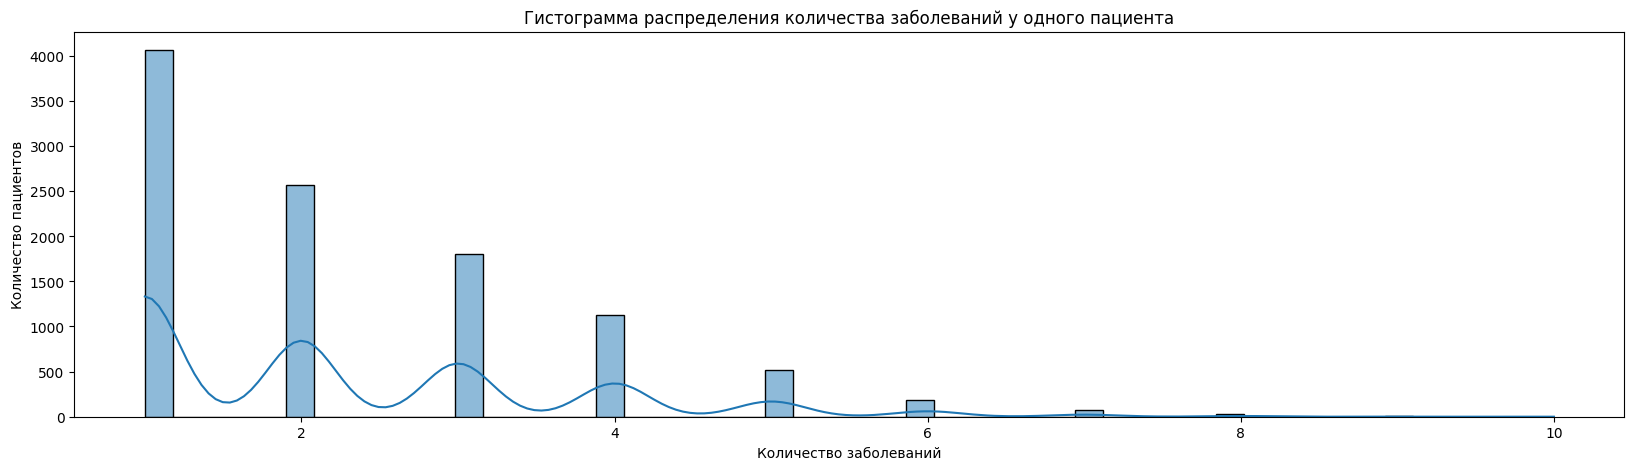

In [ ]:
plt.figure(figsize=(20, 5))

sns.histplot(df3['len_disease'], kde=True)
plt.xlabel('Количество заболеваний')
plt.ylabel('Количество пациентов')
plt.title('Гистограмма распределения количества заболеваний у одного пациента')
plt.show()

Определим количество женщин и мужчин в датасете. Мужчин больше.

In [ ]:
df_exploded.groupby('gender').agg({'id':'nunique'})

,id
gender,
Female,4793
Male,5551


Оценим распределение возраста в нашей выборке. Больше всего пациентов в возрасте 60 лет.

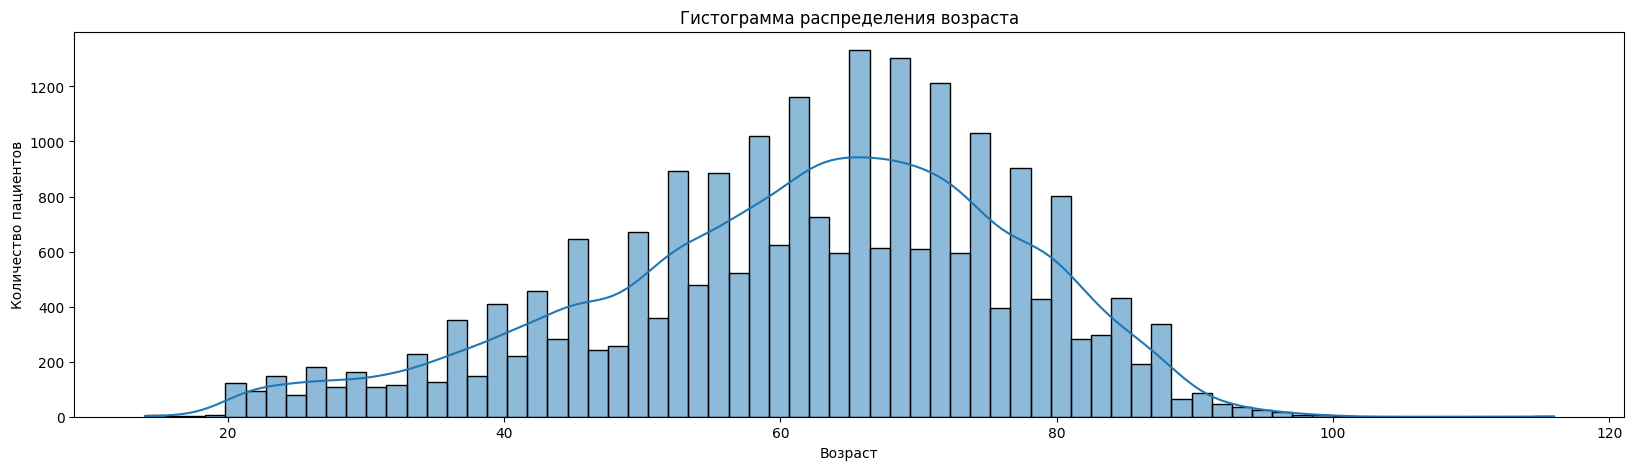

In [ ]:
plt.figure(figsize=(20, 5))  # Размер фигуры

sns.histplot(df_exploded['age'], kde=True)
plt.xlabel('Возраст')
plt.ylabel('Количество пациентов')
plt.title('Гистограмма распределения возраста')
plt.show()

Посмотрим распределение возраста у женщин и мужчин. Форма распределения схожа у обеих групп.

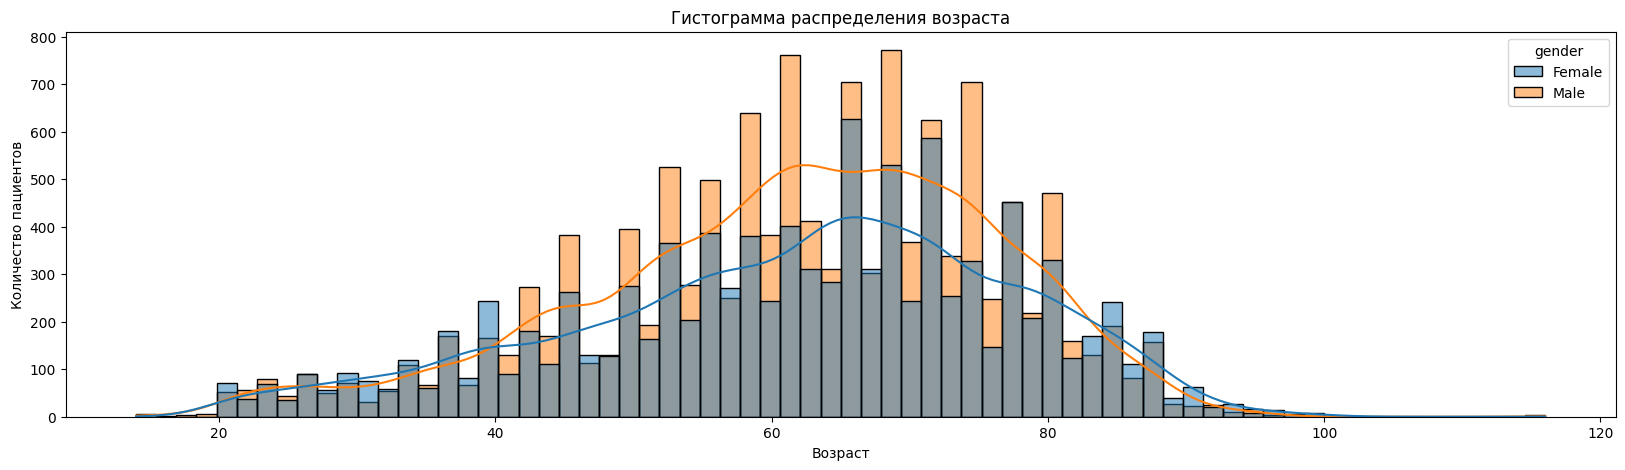

In [ ]:
plt.figure(figsize=(20, 5))  # Размер фигуры

sns.histplot(data=df_exploded, x='age', hue='gender', kde=True)
plt.xlabel('Возраст')
plt.ylabel('Количество пациентов')
plt.title('Гистограмма распределения возраста')
plt.show()

Выделим топ-20 заболеваний по количеству и посмотрим распределение возраста и пола для них.

In [ ]:
top_20_diseases = df_exploded.groupby(['disease_name', 'short_disease_name']).agg({'id':'nunique'}).sort_values(by='id', ascending=False)[:20].reset_index()['short_disease_name'].tolist()
top_20_diseases

['TAb',
 'NSSTTA',
 'SNR',
 'SB',
 'LQT',
 'STach',
 'LVH',
 'STIAb',
 'LAD',
 'LIs',
 'LAE',
 'TInv',
 'IAVB',
 'PAC',
 'AF',
 'RBBB',
 'QAb',
 'SA',
 'IIs',
 'IRBBB']

Распределение возраста здоровых пациентов (SB) схоже с заболеваниями: меньше пациентов в возрасте до 50 лет и после 80 лет, больше всего пациентов в возрасте 60-80 лет. Для SA возрастые группы представлены более равномерно, за исключением людей в возрасте 90 лет.

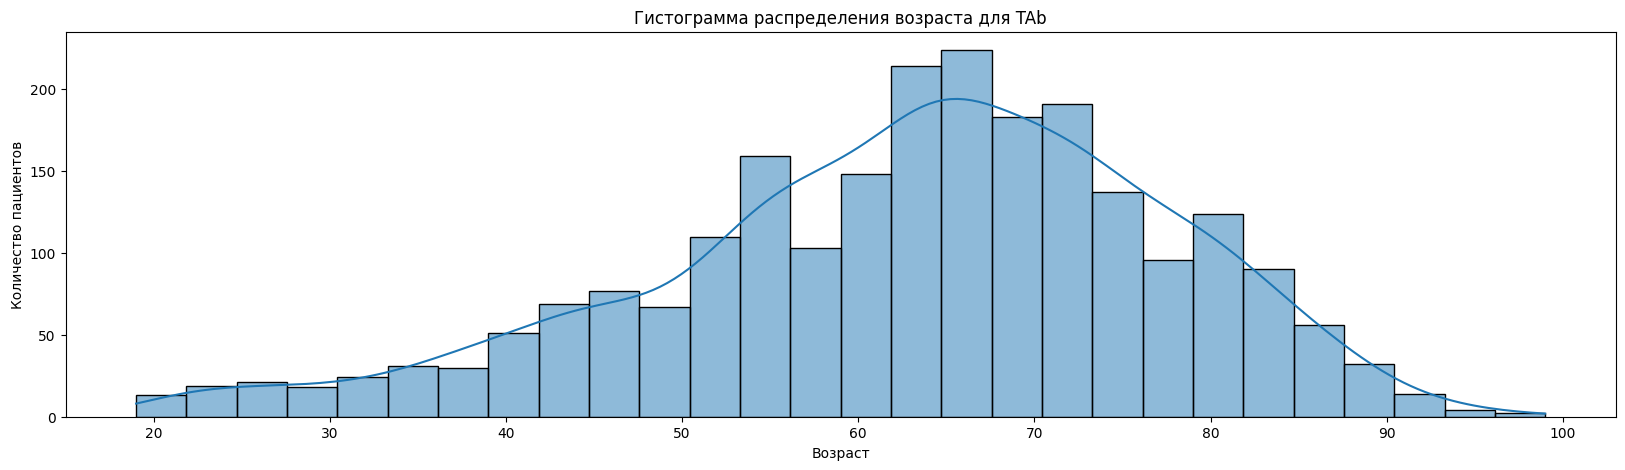

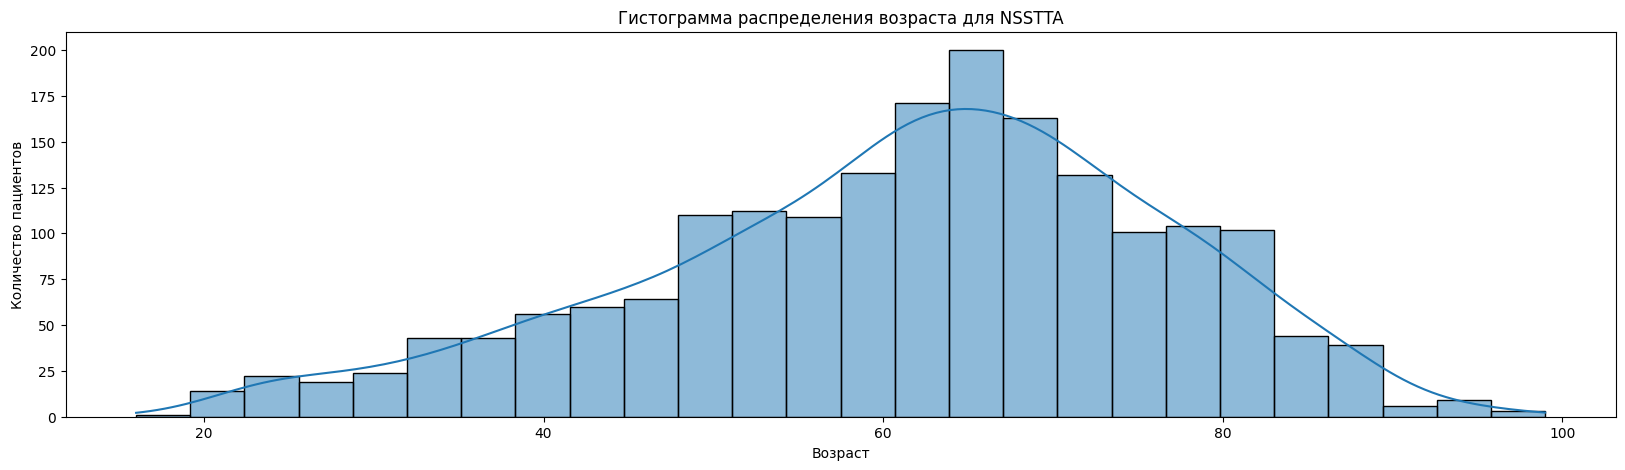

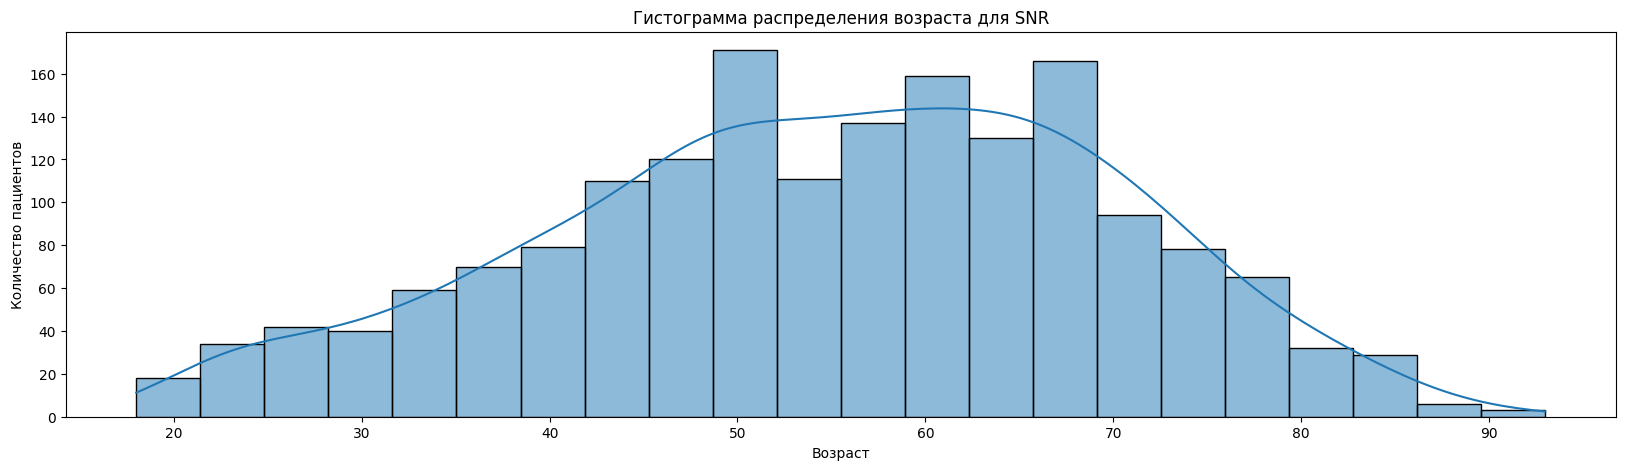

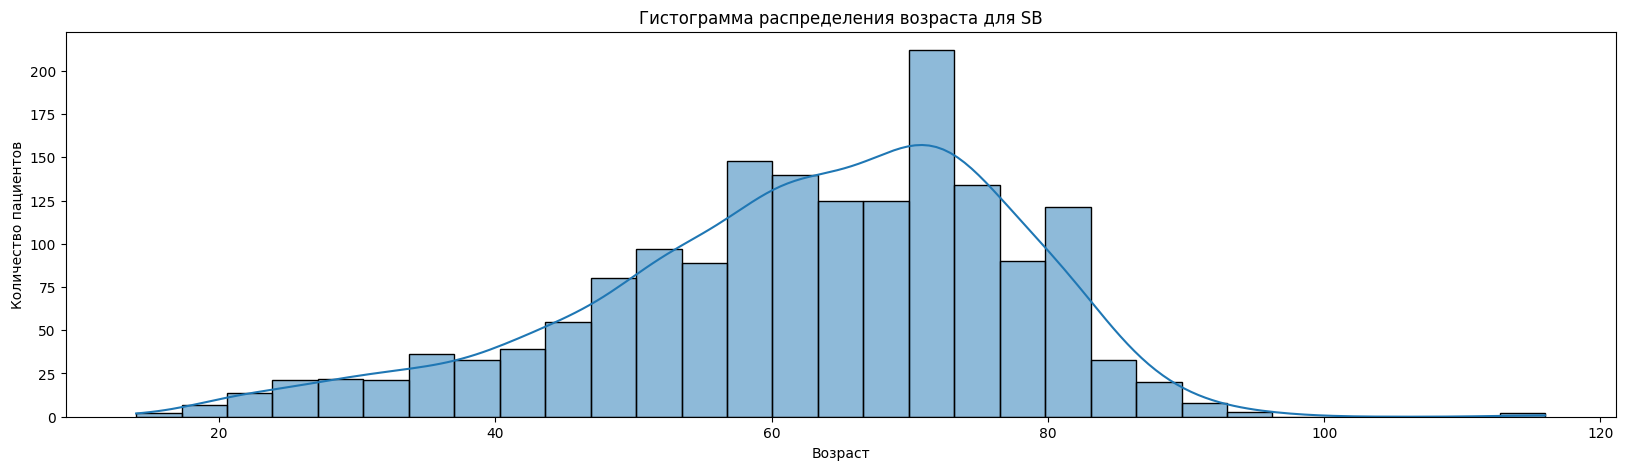

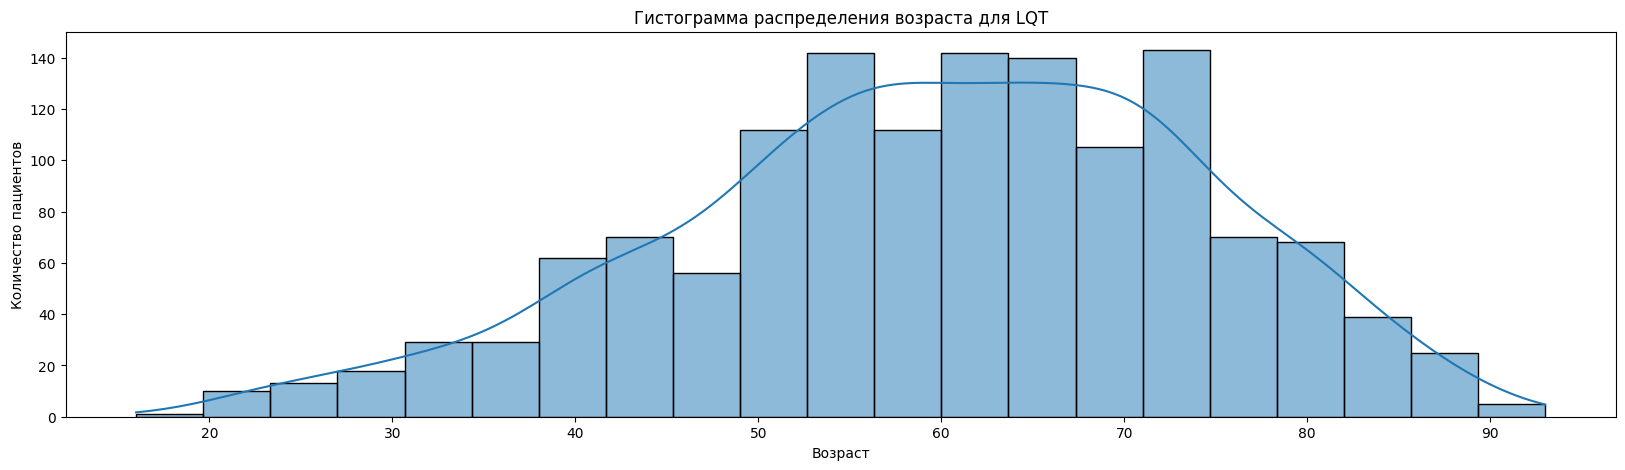

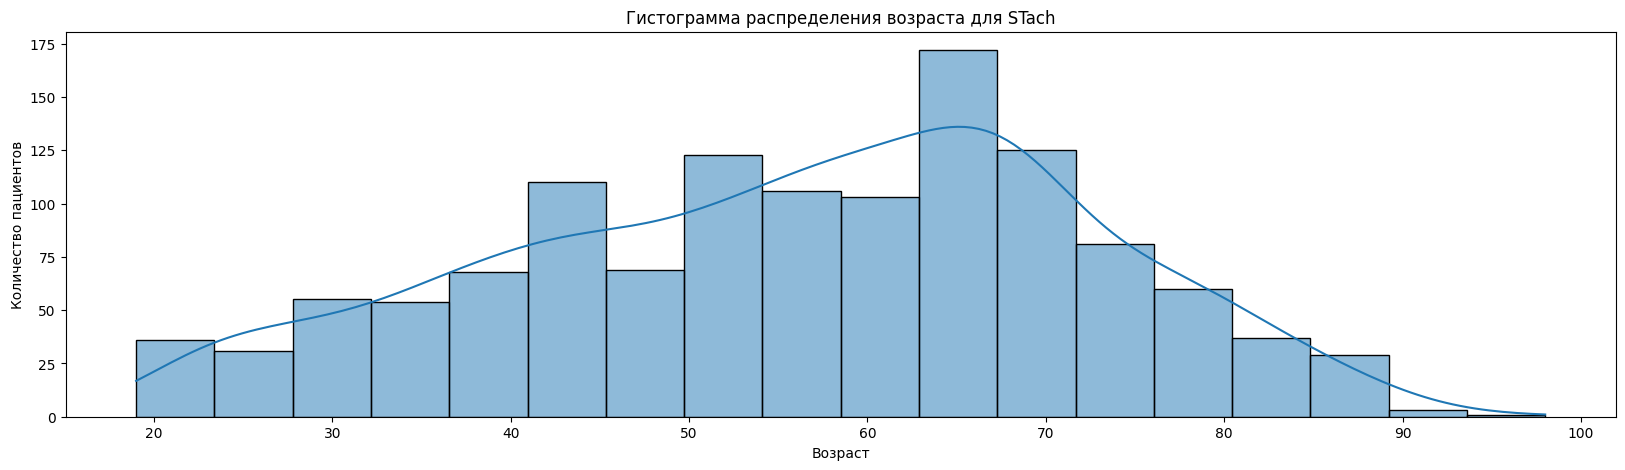

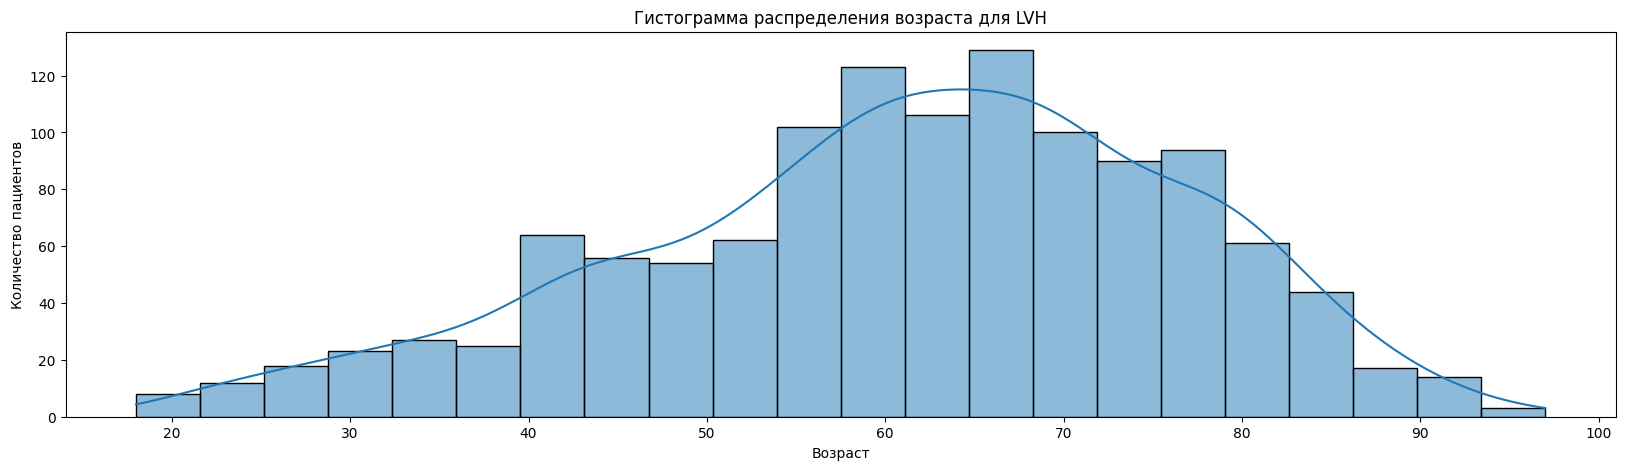

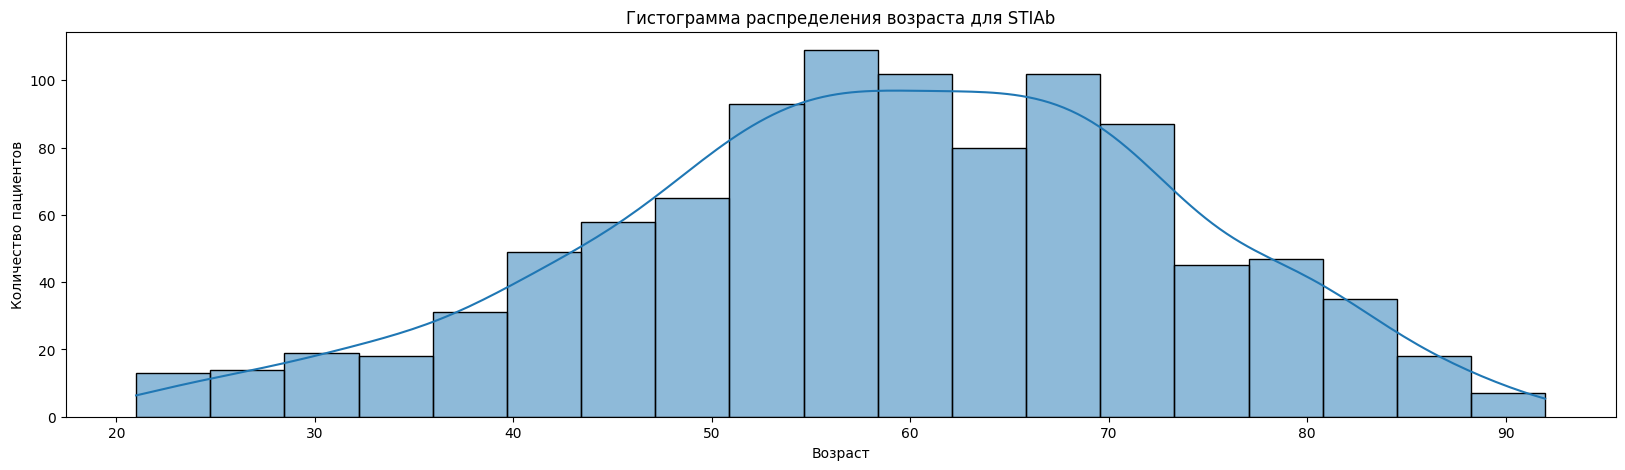

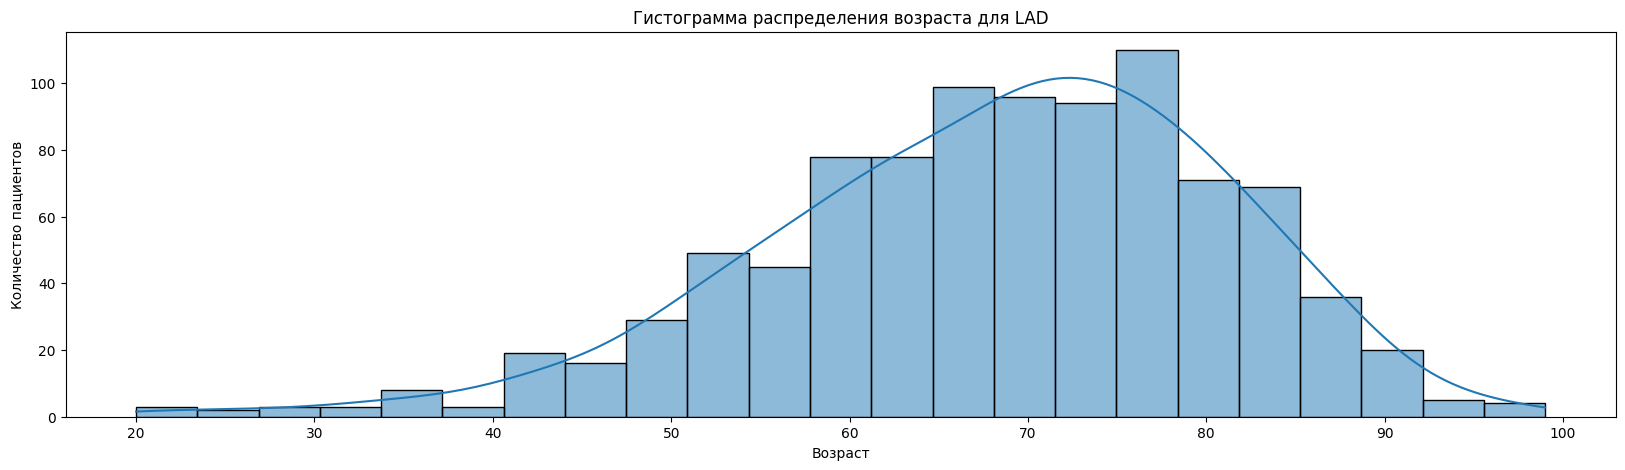

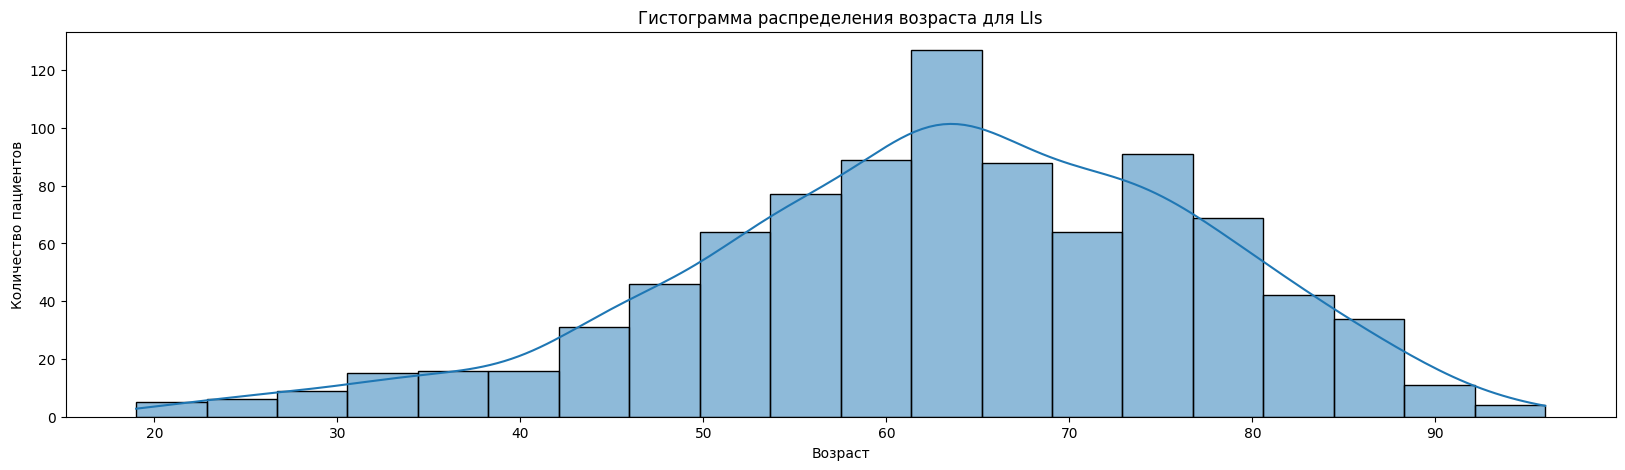

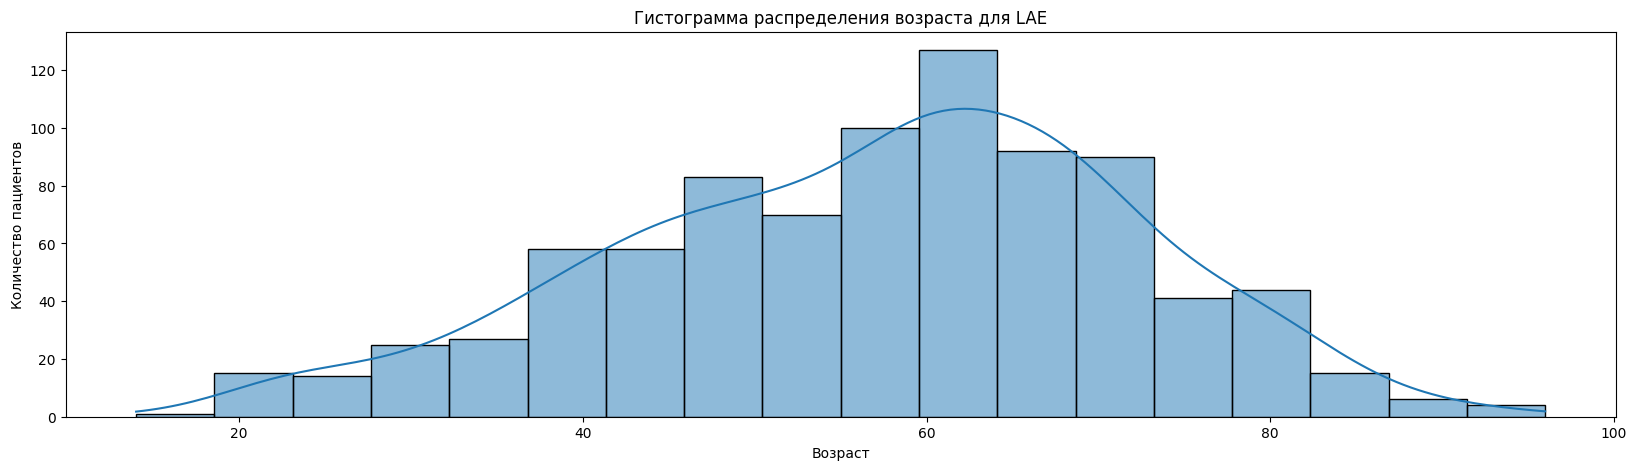

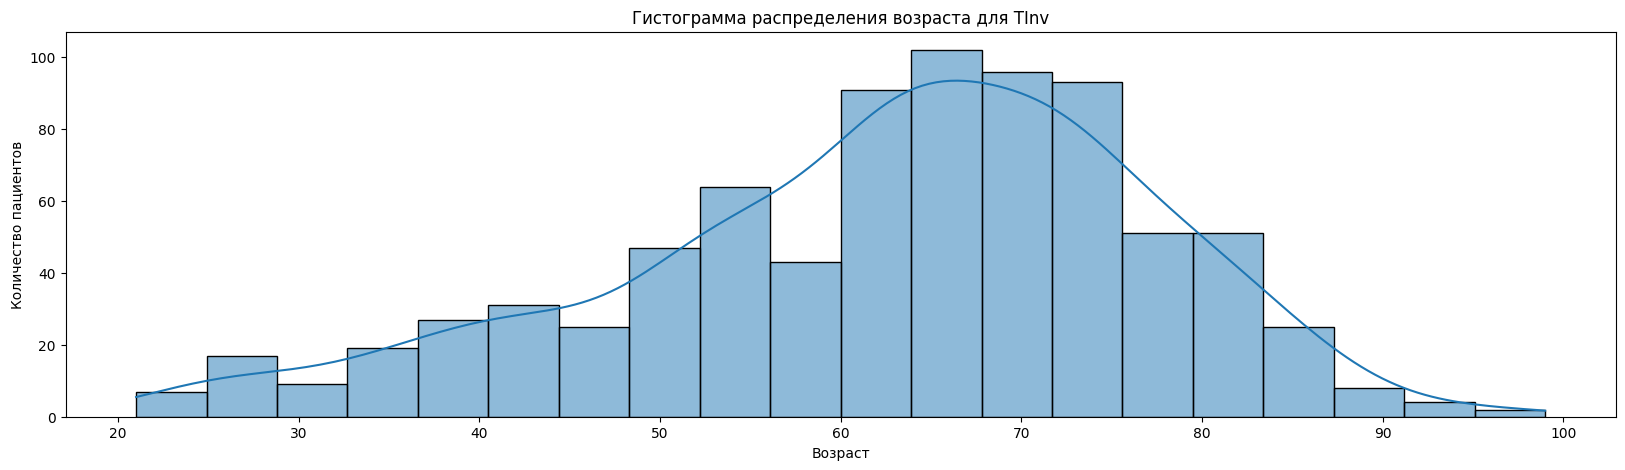

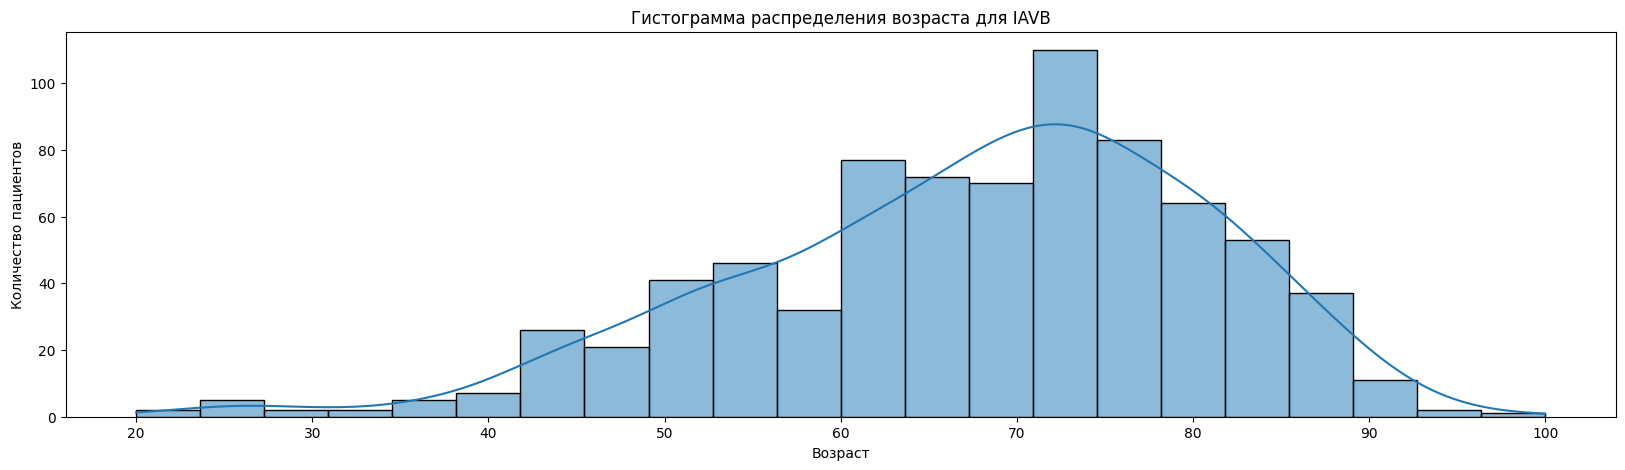

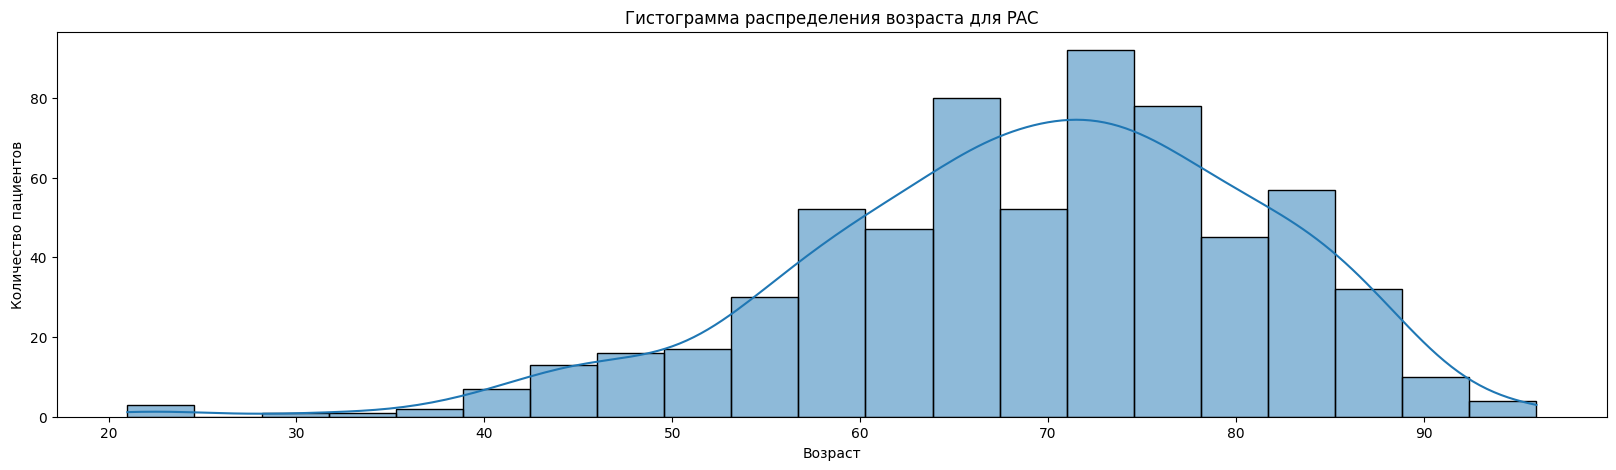

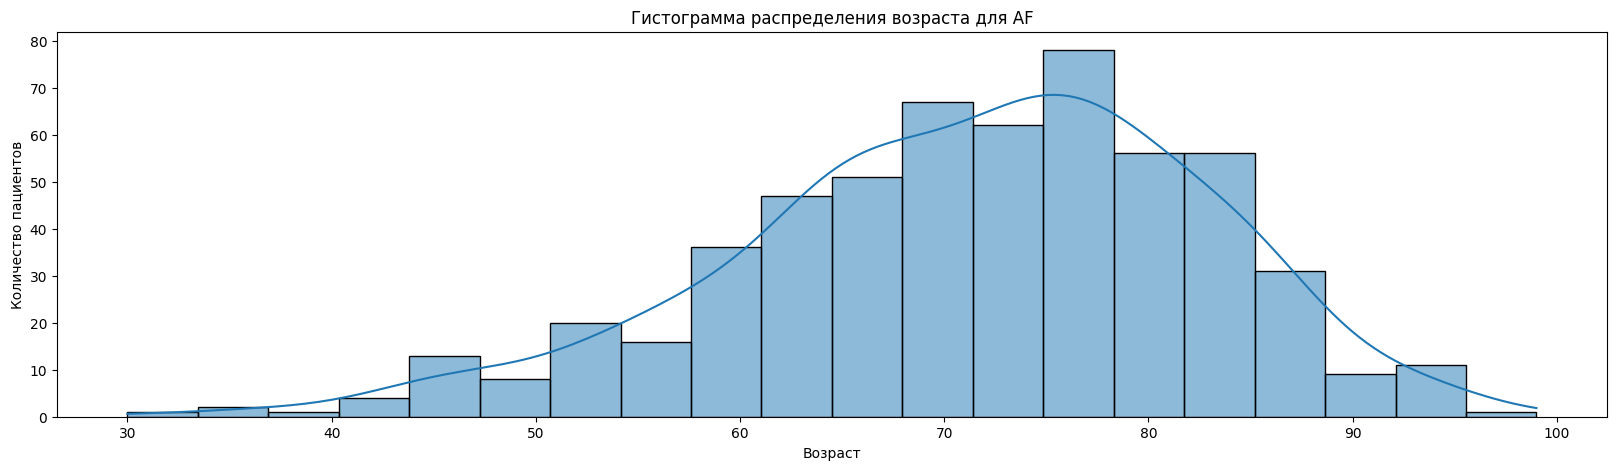

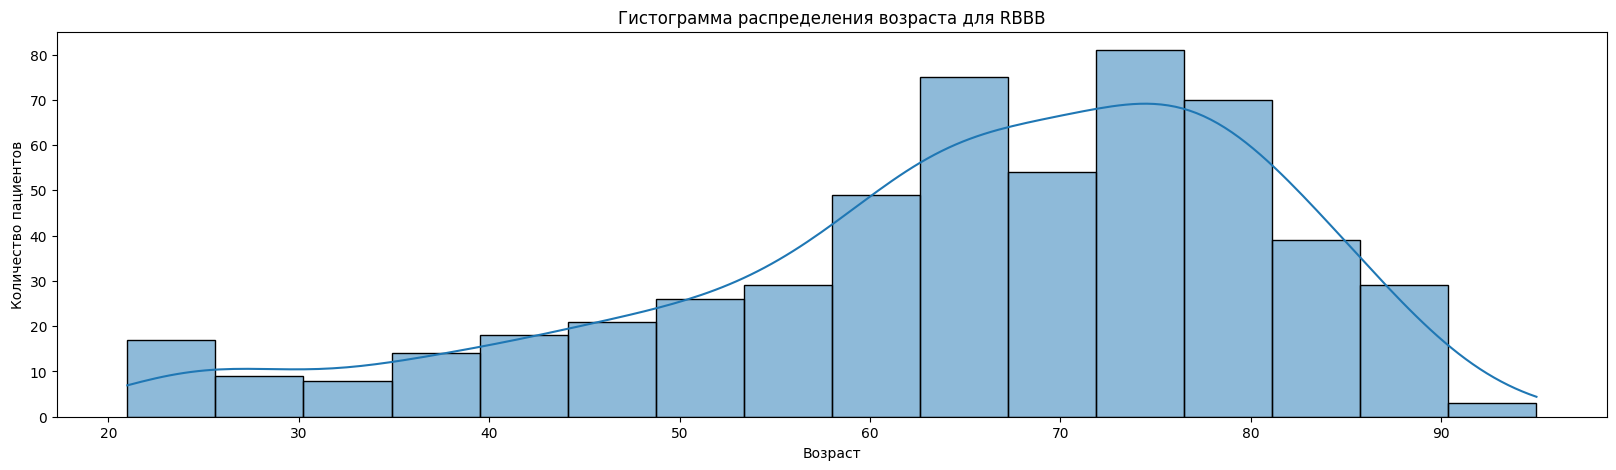

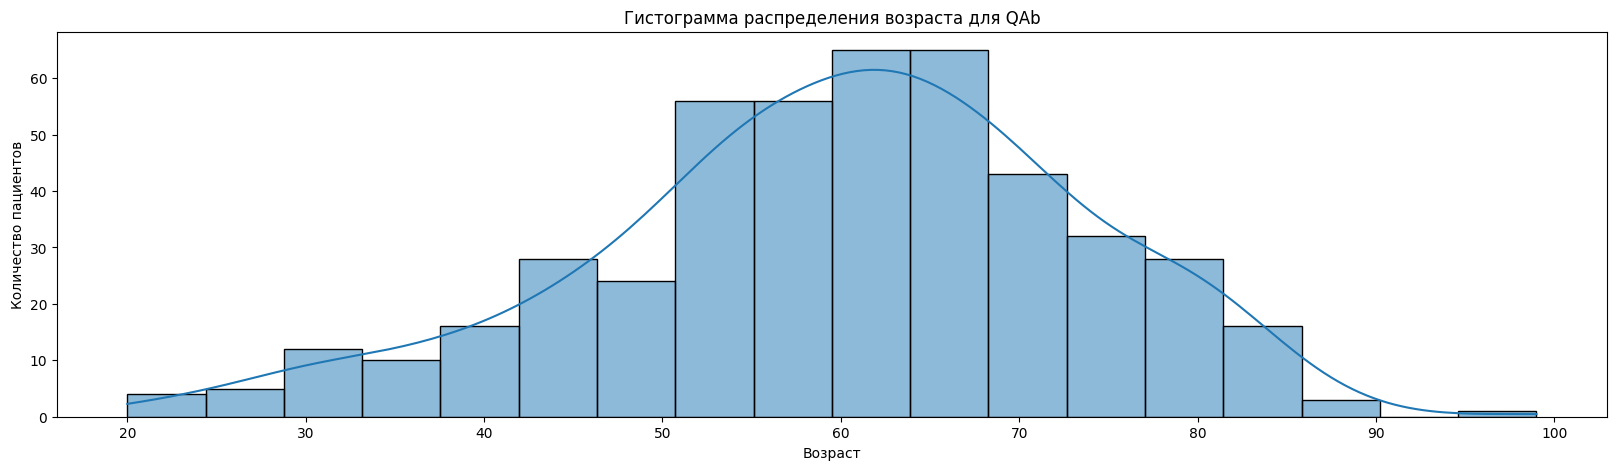

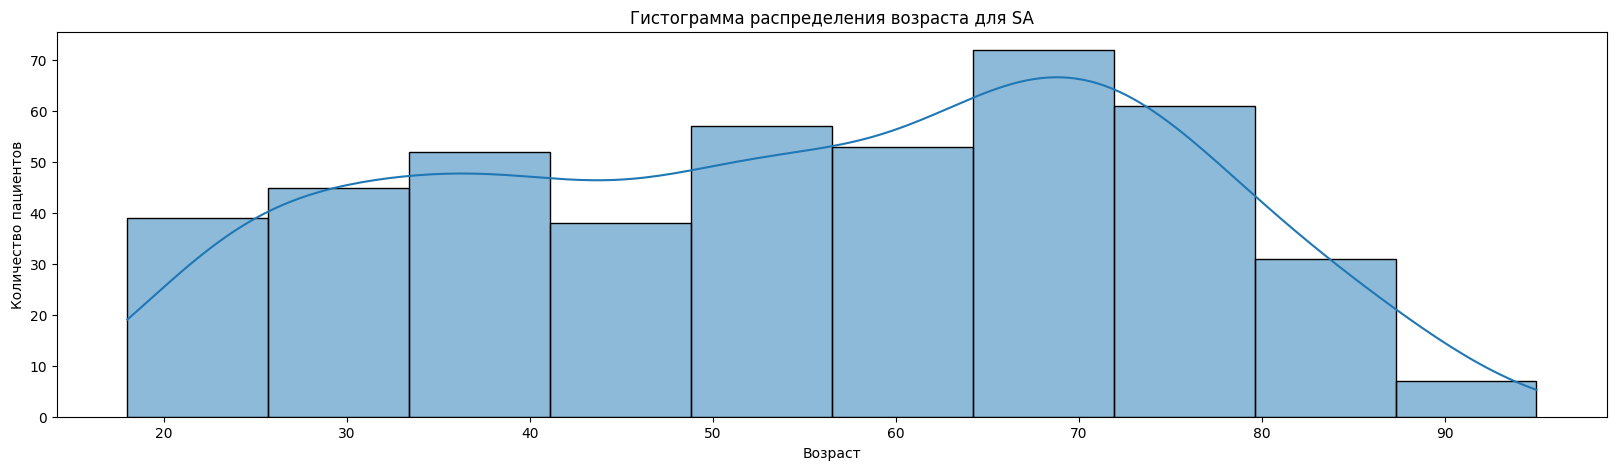

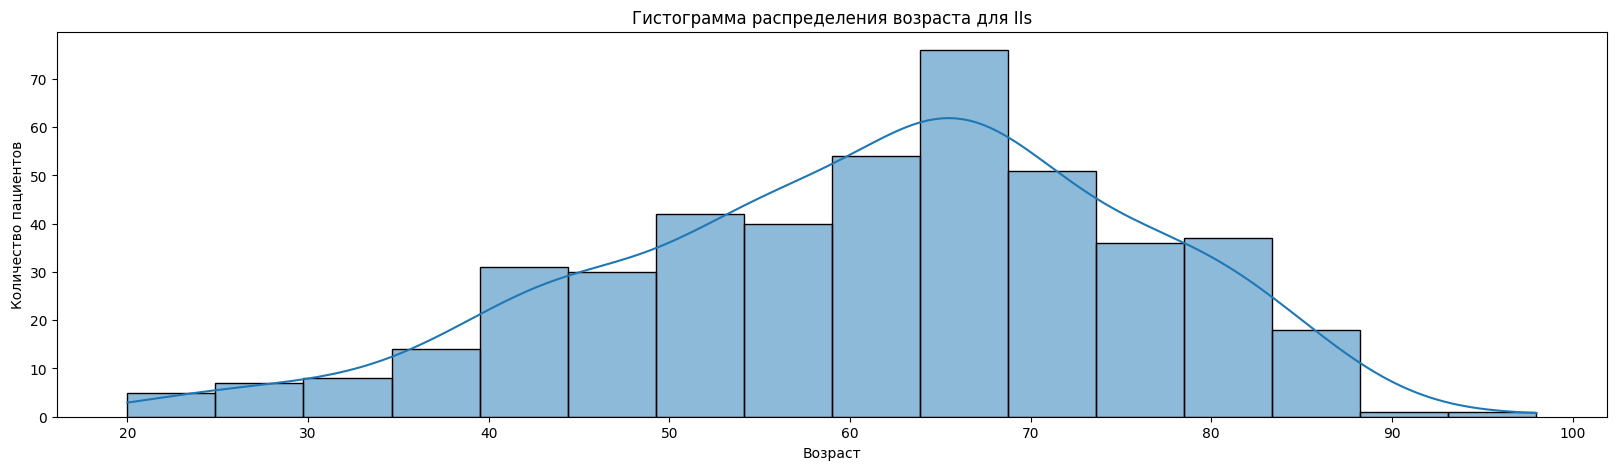

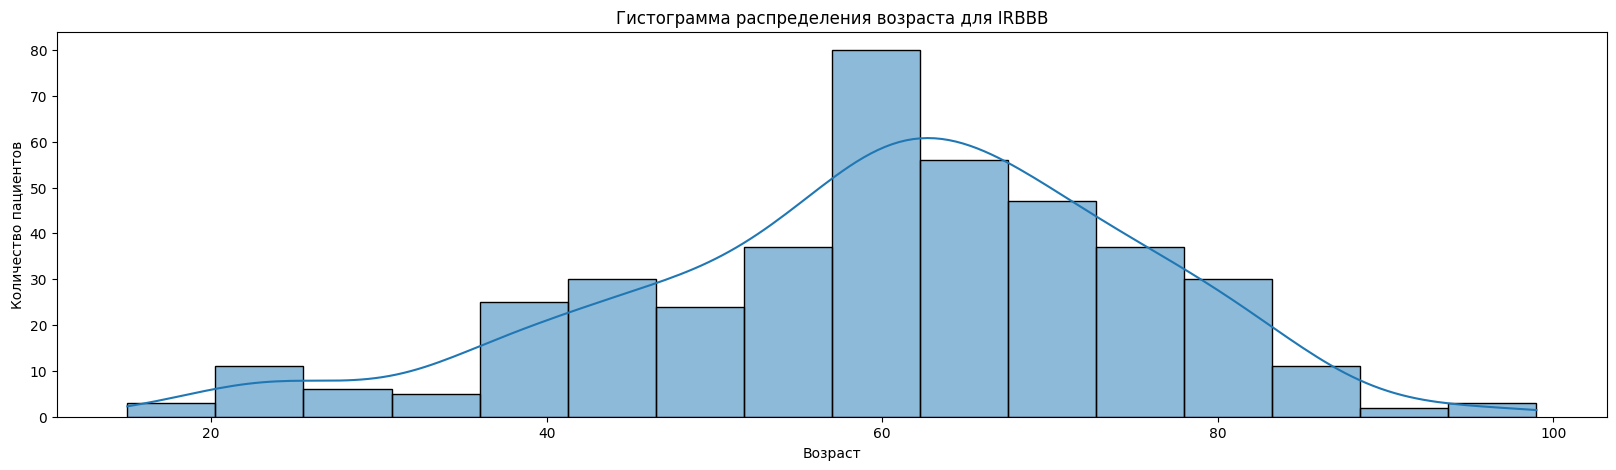

In [ ]:
for disease in top_20_diseases:
    df_to_plot = df_exploded[df_exploded.short_disease_name == disease]

    plt.figure(figsize=(20, 5))

    sns.histplot(data=df_to_plot, x='age', kde=True)
    plt.xlabel('Возраст')
    plt.ylabel('Количество пациентов')
    plt.title(f'Гистограмма распределения возраста для {disease}')
    plt.show()

Количество мужчин в датасете превалирует, кроме заболевания SNR и SA - там женщин больше.

<ipython-input-64-1a4a23a92e1f>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  men_count = df_to_plot[(df_to_plot.gender == 'Male') & (df_exploded.short_disease_name == disease)].shape[0]
<ipython-input-64-1a4a23a92e1f>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  women_count = df_to_plot[(df_to_plot.gender == 'Female') & (df_exploded.short_disease_name == disease)].shape[0]


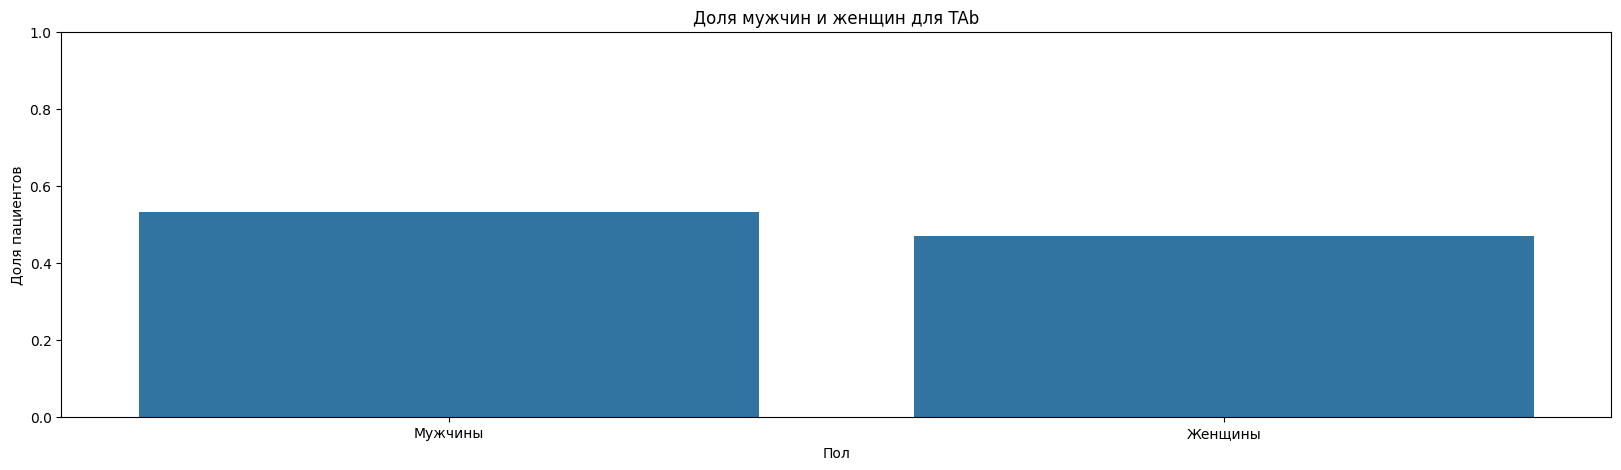

<ipython-input-64-1a4a23a92e1f>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  men_count = df_to_plot[(df_to_plot.gender == 'Male') & (df_exploded.short_disease_name == disease)].shape[0]
<ipython-input-64-1a4a23a92e1f>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  women_count = df_to_plot[(df_to_plot.gender == 'Female') & (df_exploded.short_disease_name == disease)].shape[0]


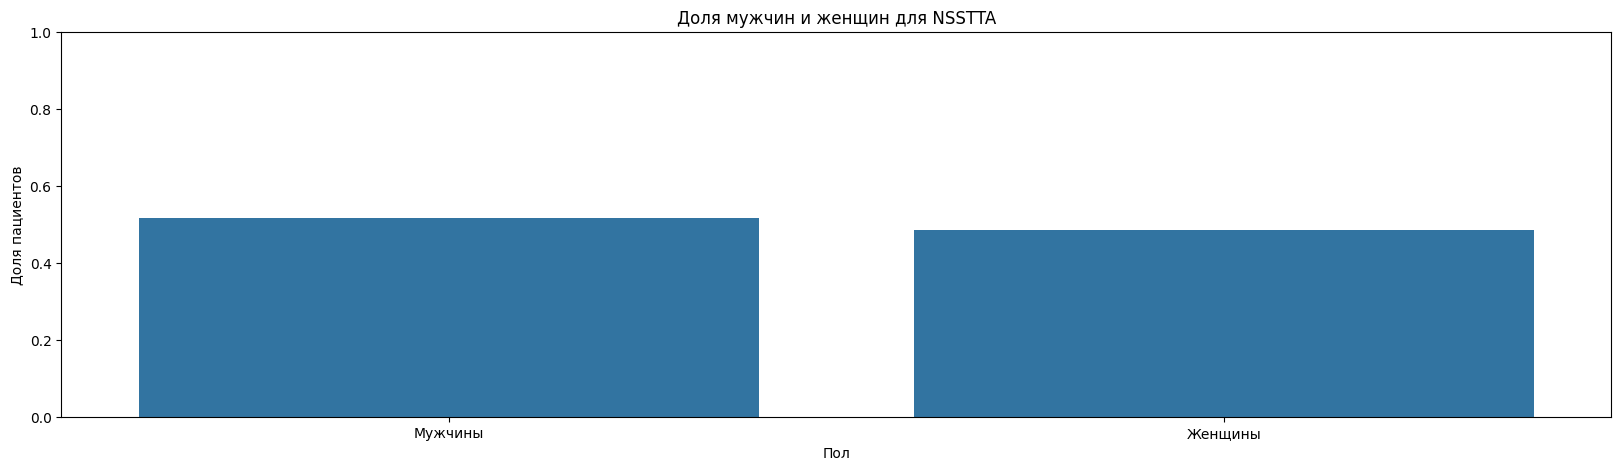

<ipython-input-64-1a4a23a92e1f>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  men_count = df_to_plot[(df_to_plot.gender == 'Male') & (df_exploded.short_disease_name == disease)].shape[0]
<ipython-input-64-1a4a23a92e1f>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  women_count = df_to_plot[(df_to_plot.gender == 'Female') & (df_exploded.short_disease_name == disease)].shape[0]


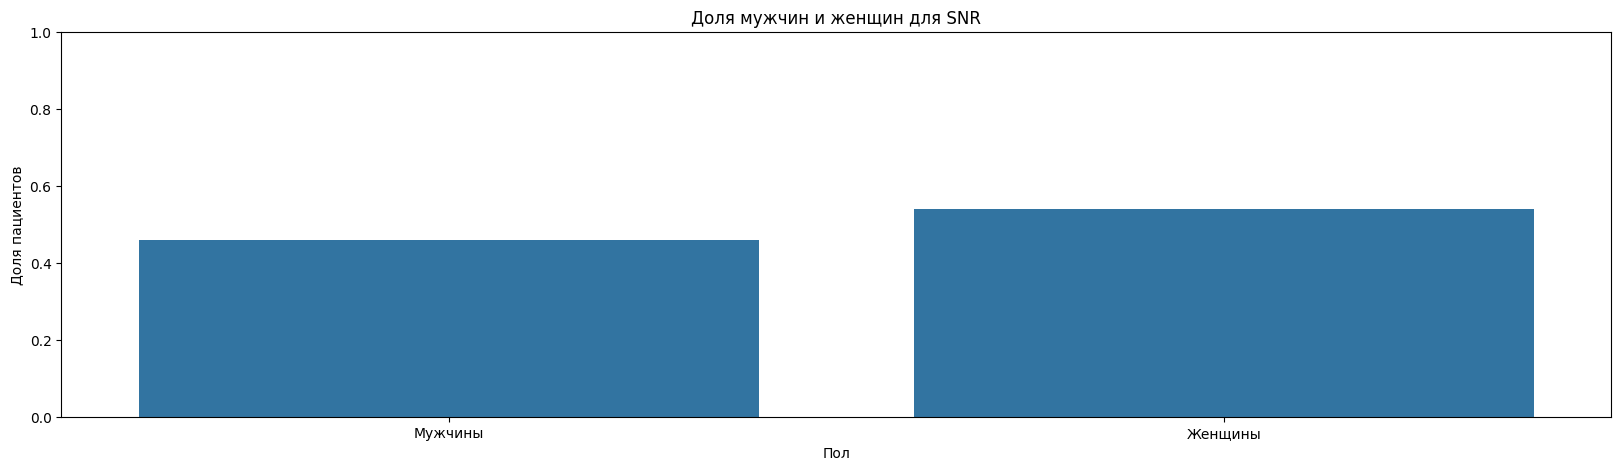

<ipython-input-64-1a4a23a92e1f>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  men_count = df_to_plot[(df_to_plot.gender == 'Male') & (df_exploded.short_disease_name == disease)].shape[0]
<ipython-input-64-1a4a23a92e1f>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  women_count = df_to_plot[(df_to_plot.gender == 'Female') & (df_exploded.short_disease_name == disease)].shape[0]


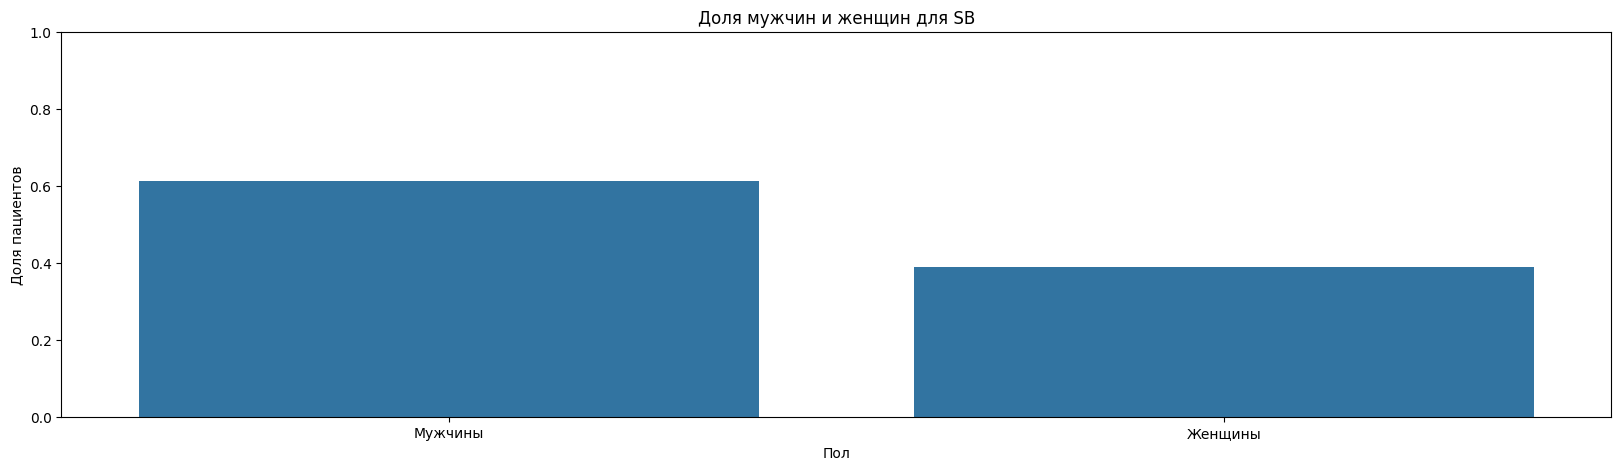

<ipython-input-64-1a4a23a92e1f>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  men_count = df_to_plot[(df_to_plot.gender == 'Male') & (df_exploded.short_disease_name == disease)].shape[0]
<ipython-input-64-1a4a23a92e1f>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  women_count = df_to_plot[(df_to_plot.gender == 'Female') & (df_exploded.short_disease_name == disease)].shape[0]


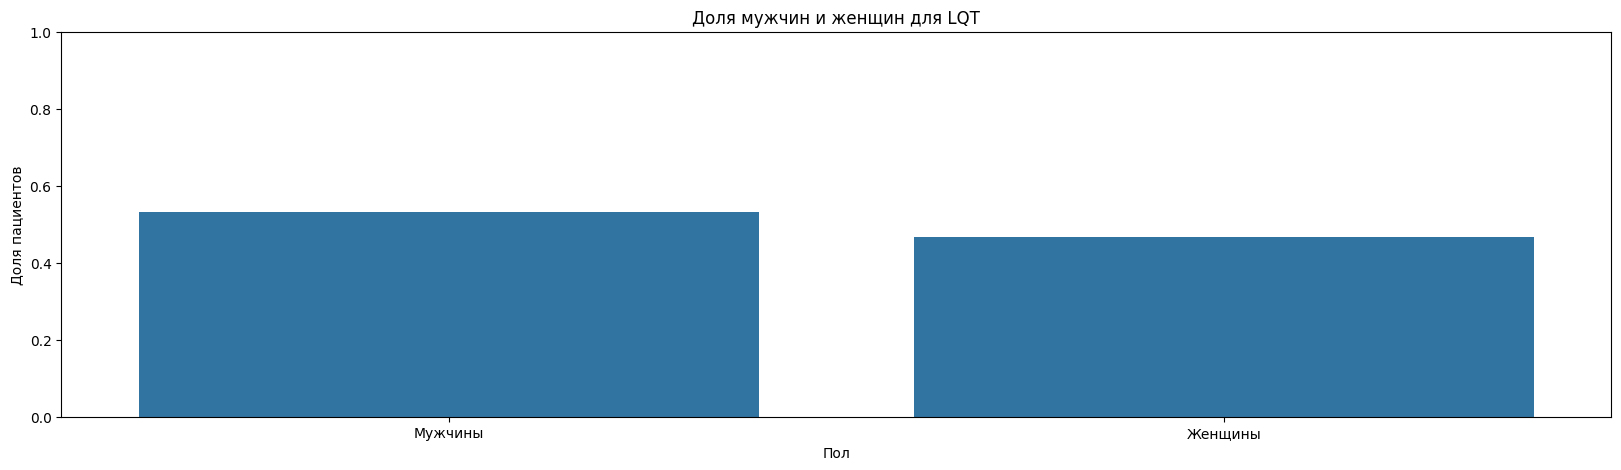

<ipython-input-64-1a4a23a92e1f>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  men_count = df_to_plot[(df_to_plot.gender == 'Male') & (df_exploded.short_disease_name == disease)].shape[0]
<ipython-input-64-1a4a23a92e1f>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  women_count = df_to_plot[(df_to_plot.gender == 'Female') & (df_exploded.short_disease_name == disease)].shape[0]


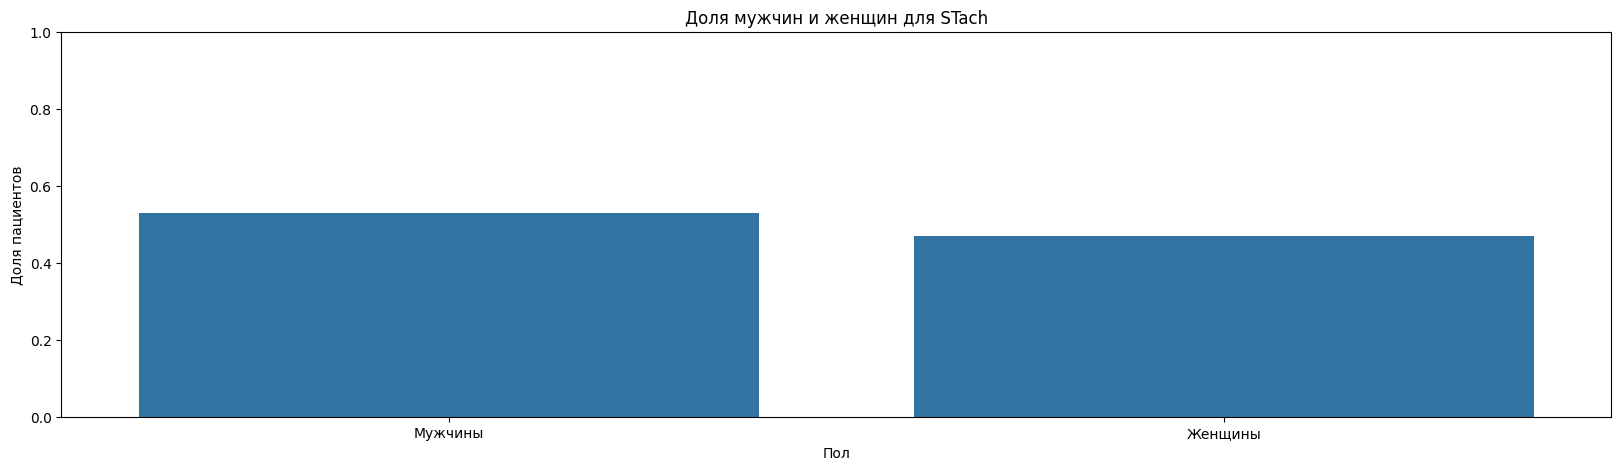

<ipython-input-64-1a4a23a92e1f>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  men_count = df_to_plot[(df_to_plot.gender == 'Male') & (df_exploded.short_disease_name == disease)].shape[0]
<ipython-input-64-1a4a23a92e1f>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  women_count = df_to_plot[(df_to_plot.gender == 'Female') & (df_exploded.short_disease_name == disease)].shape[0]


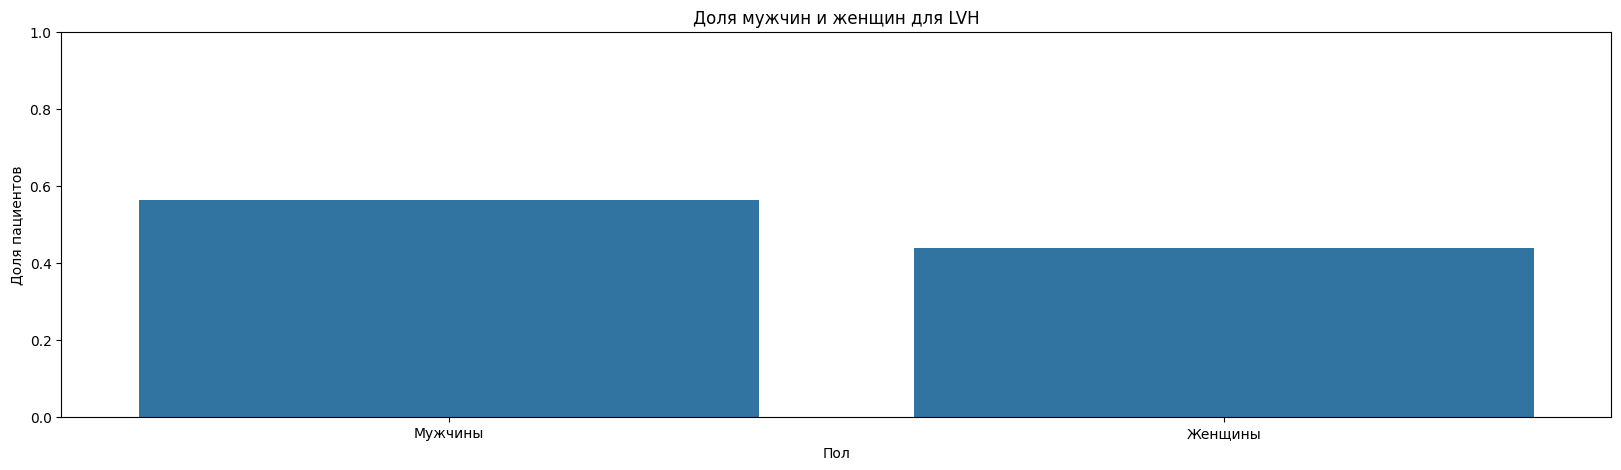

<ipython-input-64-1a4a23a92e1f>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  men_count = df_to_plot[(df_to_plot.gender == 'Male') & (df_exploded.short_disease_name == disease)].shape[0]
<ipython-input-64-1a4a23a92e1f>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  women_count = df_to_plot[(df_to_plot.gender == 'Female') & (df_exploded.short_disease_name == disease)].shape[0]


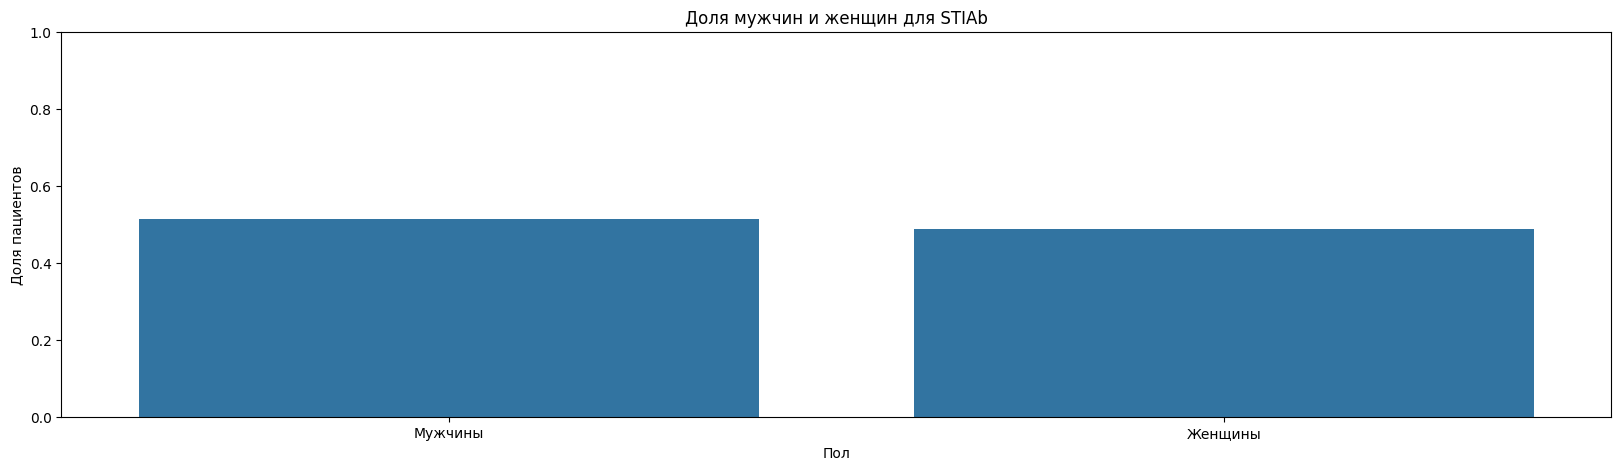

<ipython-input-64-1a4a23a92e1f>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  men_count = df_to_plot[(df_to_plot.gender == 'Male') & (df_exploded.short_disease_name == disease)].shape[0]
<ipython-input-64-1a4a23a92e1f>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  women_count = df_to_plot[(df_to_plot.gender == 'Female') & (df_exploded.short_disease_name == disease)].shape[0]


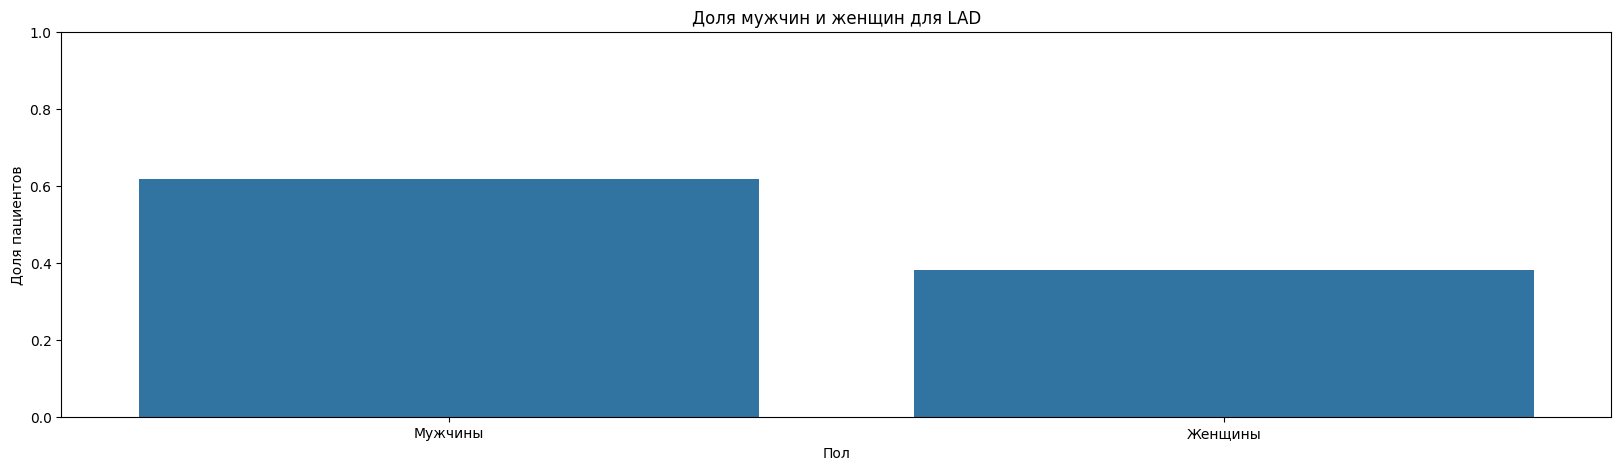

<ipython-input-64-1a4a23a92e1f>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  men_count = df_to_plot[(df_to_plot.gender == 'Male') & (df_exploded.short_disease_name == disease)].shape[0]
<ipython-input-64-1a4a23a92e1f>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  women_count = df_to_plot[(df_to_plot.gender == 'Female') & (df_exploded.short_disease_name == disease)].shape[0]


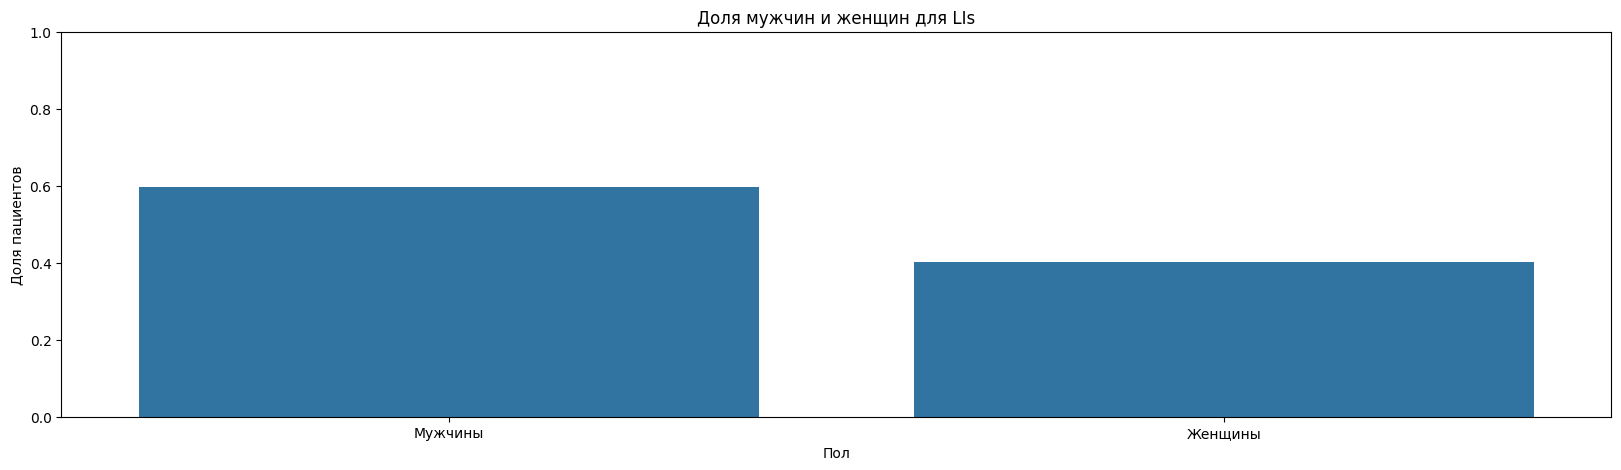

<ipython-input-64-1a4a23a92e1f>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  men_count = df_to_plot[(df_to_plot.gender == 'Male') & (df_exploded.short_disease_name == disease)].shape[0]
<ipython-input-64-1a4a23a92e1f>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  women_count = df_to_plot[(df_to_plot.gender == 'Female') & (df_exploded.short_disease_name == disease)].shape[0]


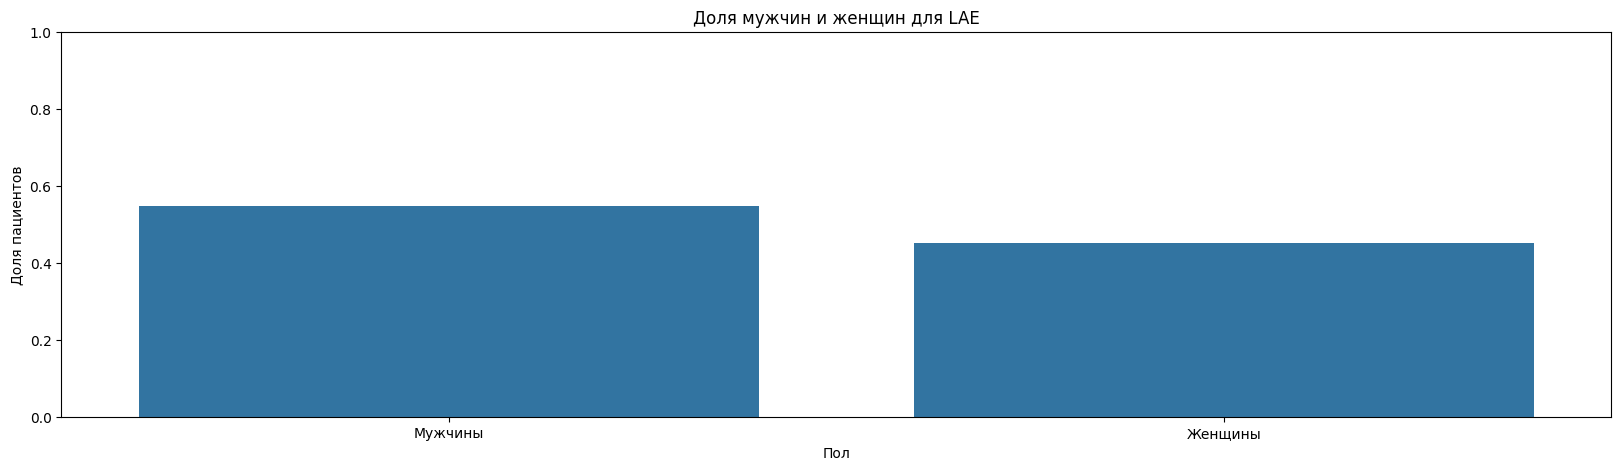

<ipython-input-64-1a4a23a92e1f>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  men_count = df_to_plot[(df_to_plot.gender == 'Male') & (df_exploded.short_disease_name == disease)].shape[0]
<ipython-input-64-1a4a23a92e1f>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  women_count = df_to_plot[(df_to_plot.gender == 'Female') & (df_exploded.short_disease_name == disease)].shape[0]


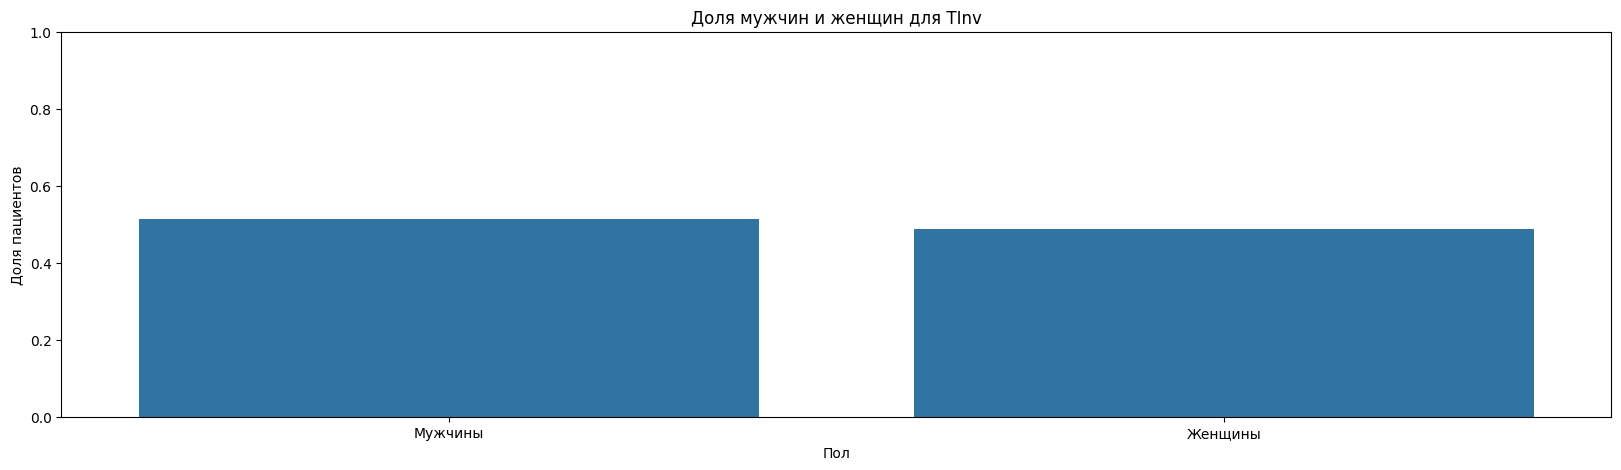

<ipython-input-64-1a4a23a92e1f>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  men_count = df_to_plot[(df_to_plot.gender == 'Male') & (df_exploded.short_disease_name == disease)].shape[0]
<ipython-input-64-1a4a23a92e1f>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  women_count = df_to_plot[(df_to_plot.gender == 'Female') & (df_exploded.short_disease_name == disease)].shape[0]


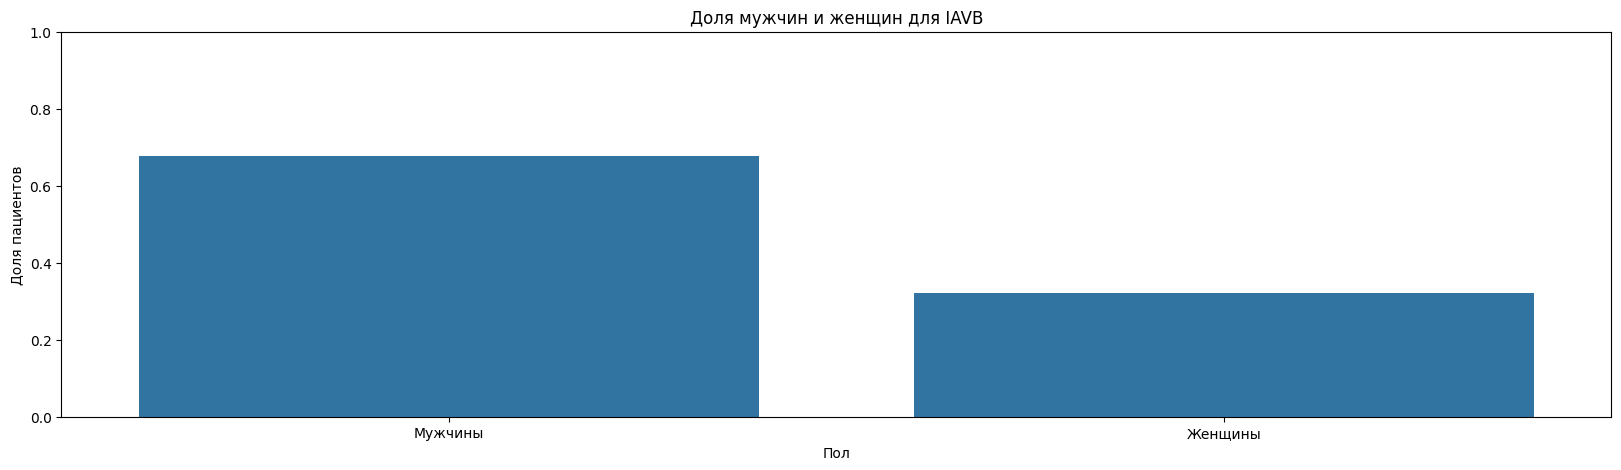

<ipython-input-64-1a4a23a92e1f>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  men_count = df_to_plot[(df_to_plot.gender == 'Male') & (df_exploded.short_disease_name == disease)].shape[0]
<ipython-input-64-1a4a23a92e1f>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  women_count = df_to_plot[(df_to_plot.gender == 'Female') & (df_exploded.short_disease_name == disease)].shape[0]


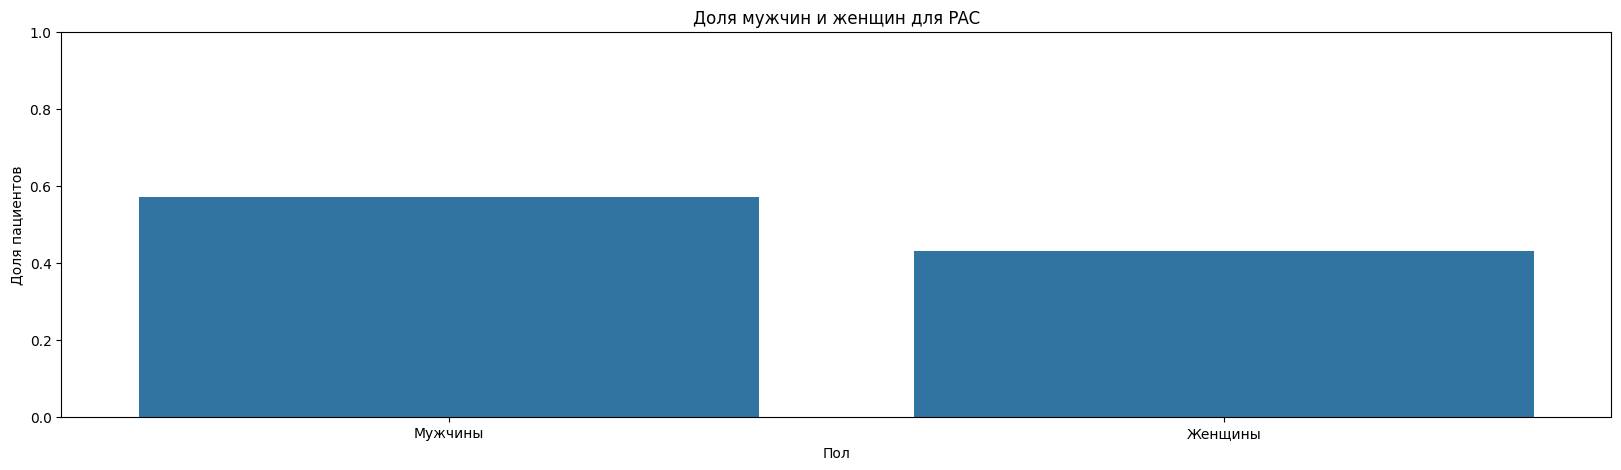

<ipython-input-64-1a4a23a92e1f>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  men_count = df_to_plot[(df_to_plot.gender == 'Male') & (df_exploded.short_disease_name == disease)].shape[0]
<ipython-input-64-1a4a23a92e1f>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  women_count = df_to_plot[(df_to_plot.gender == 'Female') & (df_exploded.short_disease_name == disease)].shape[0]


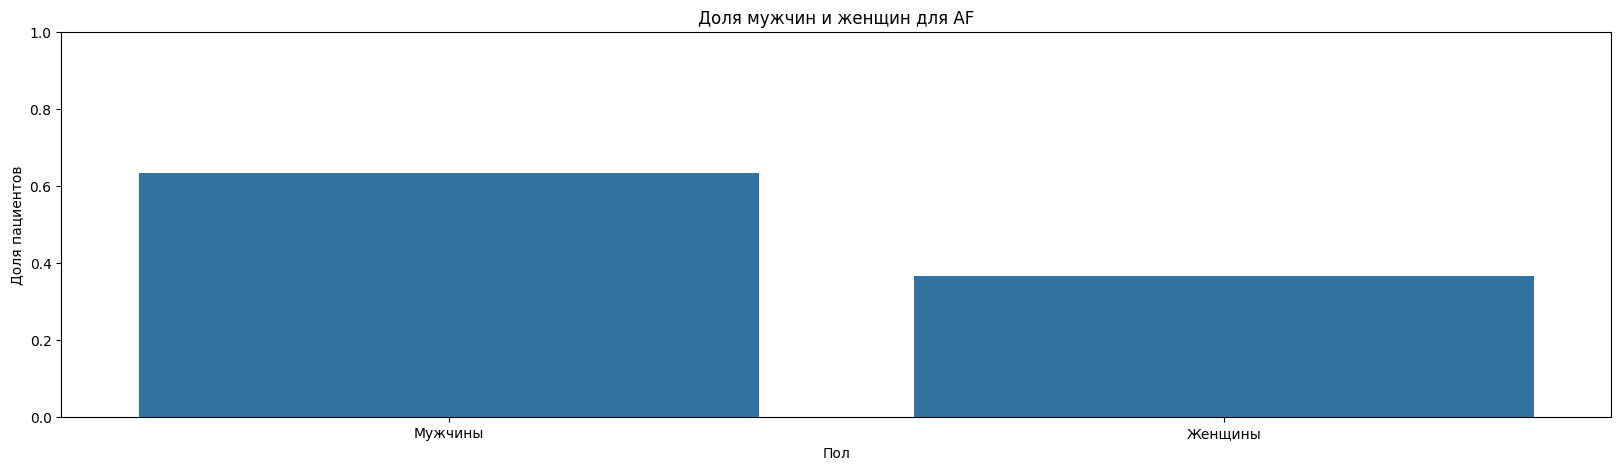

<ipython-input-64-1a4a23a92e1f>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  men_count = df_to_plot[(df_to_plot.gender == 'Male') & (df_exploded.short_disease_name == disease)].shape[0]
<ipython-input-64-1a4a23a92e1f>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  women_count = df_to_plot[(df_to_plot.gender == 'Female') & (df_exploded.short_disease_name == disease)].shape[0]


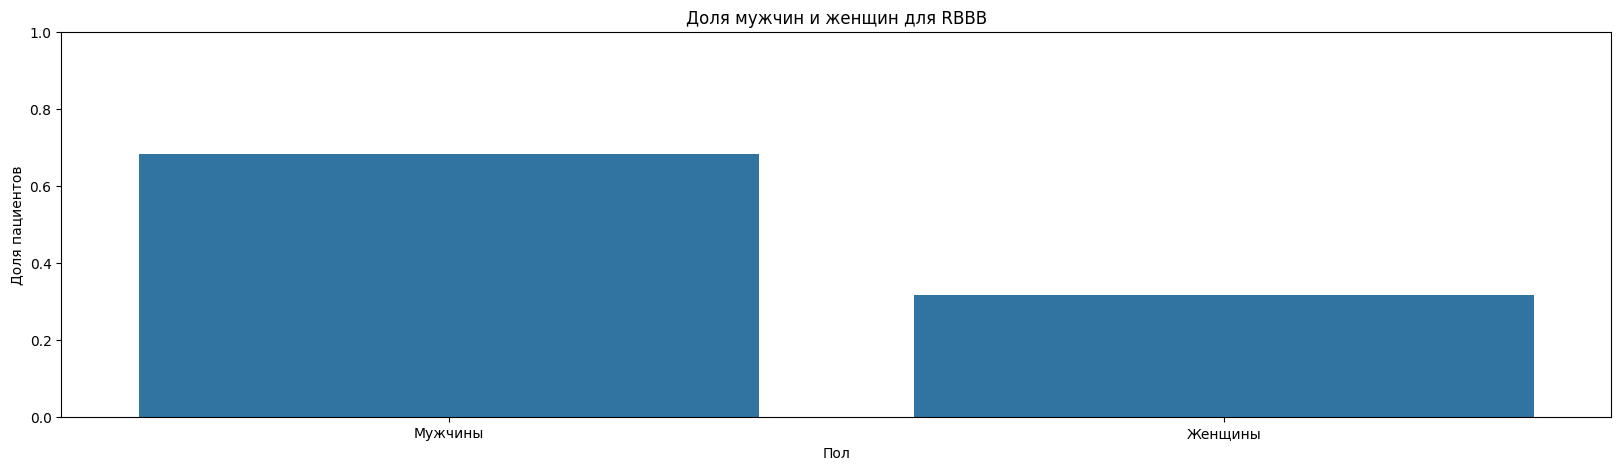

<ipython-input-64-1a4a23a92e1f>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  men_count = df_to_plot[(df_to_plot.gender == 'Male') & (df_exploded.short_disease_name == disease)].shape[0]
<ipython-input-64-1a4a23a92e1f>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  women_count = df_to_plot[(df_to_plot.gender == 'Female') & (df_exploded.short_disease_name == disease)].shape[0]


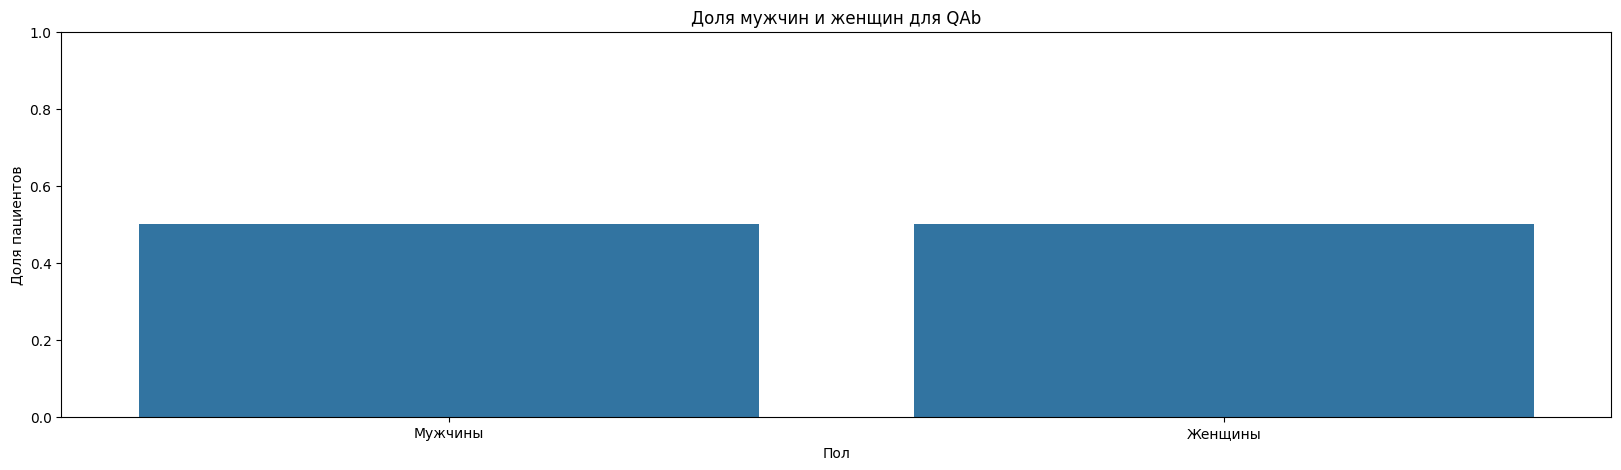

<ipython-input-64-1a4a23a92e1f>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  men_count = df_to_plot[(df_to_plot.gender == 'Male') & (df_exploded.short_disease_name == disease)].shape[0]
<ipython-input-64-1a4a23a92e1f>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  women_count = df_to_plot[(df_to_plot.gender == 'Female') & (df_exploded.short_disease_name == disease)].shape[0]


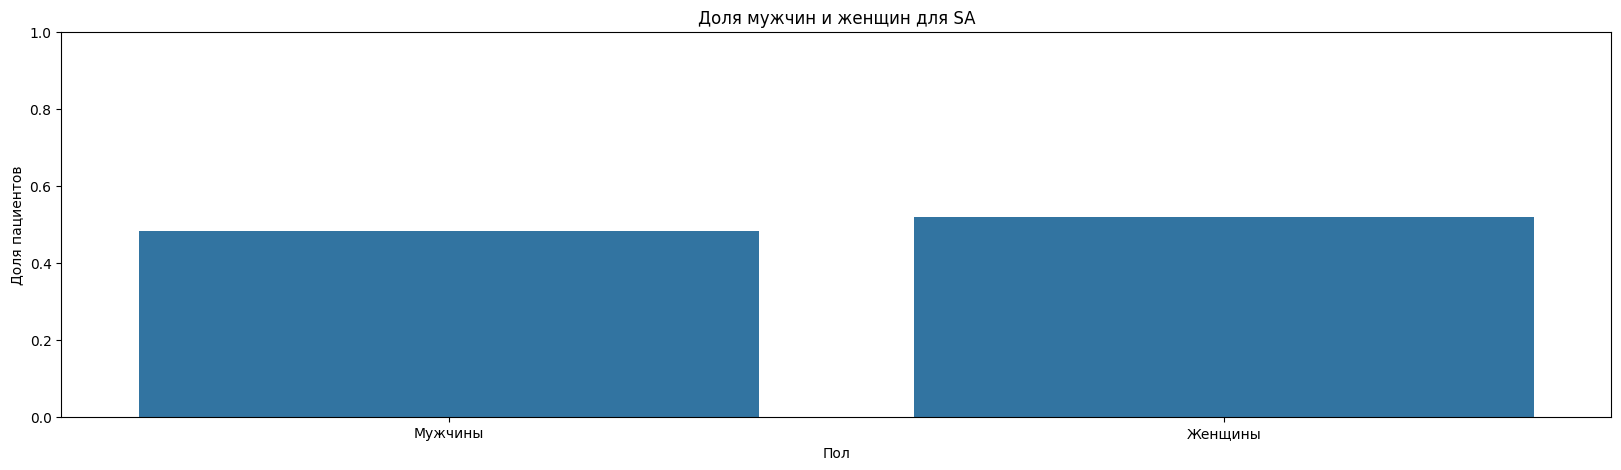

<ipython-input-64-1a4a23a92e1f>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  men_count = df_to_plot[(df_to_plot.gender == 'Male') & (df_exploded.short_disease_name == disease)].shape[0]
<ipython-input-64-1a4a23a92e1f>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  women_count = df_to_plot[(df_to_plot.gender == 'Female') & (df_exploded.short_disease_name == disease)].shape[0]


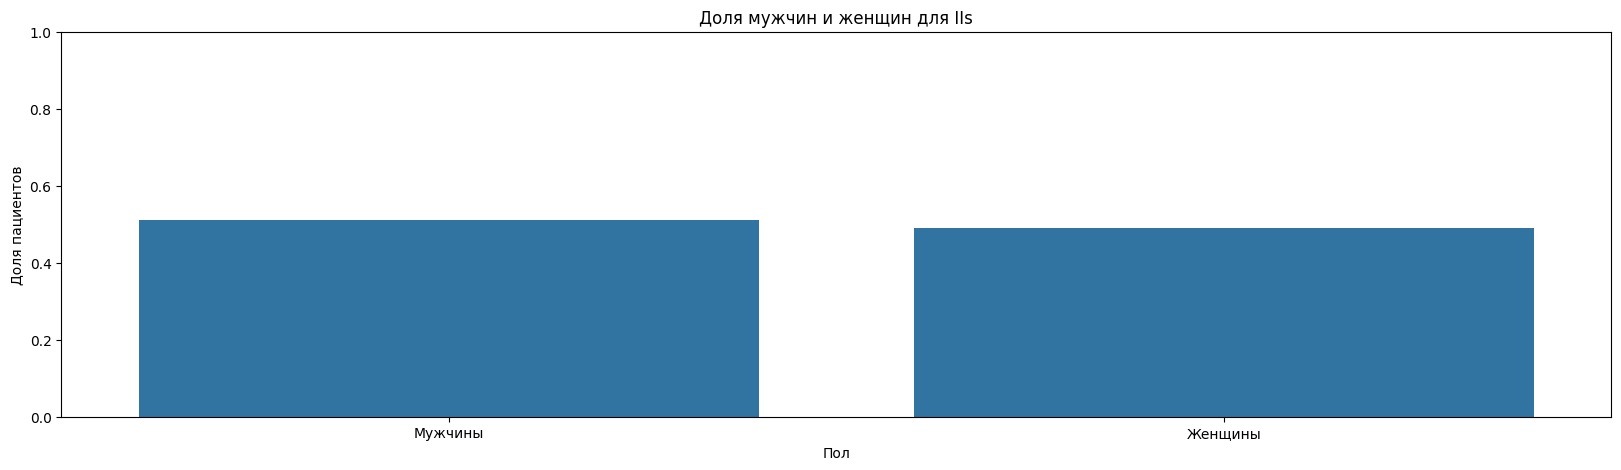

<ipython-input-64-1a4a23a92e1f>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  men_count = df_to_plot[(df_to_plot.gender == 'Male') & (df_exploded.short_disease_name == disease)].shape[0]
<ipython-input-64-1a4a23a92e1f>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  women_count = df_to_plot[(df_to_plot.gender == 'Female') & (df_exploded.short_disease_name == disease)].shape[0]


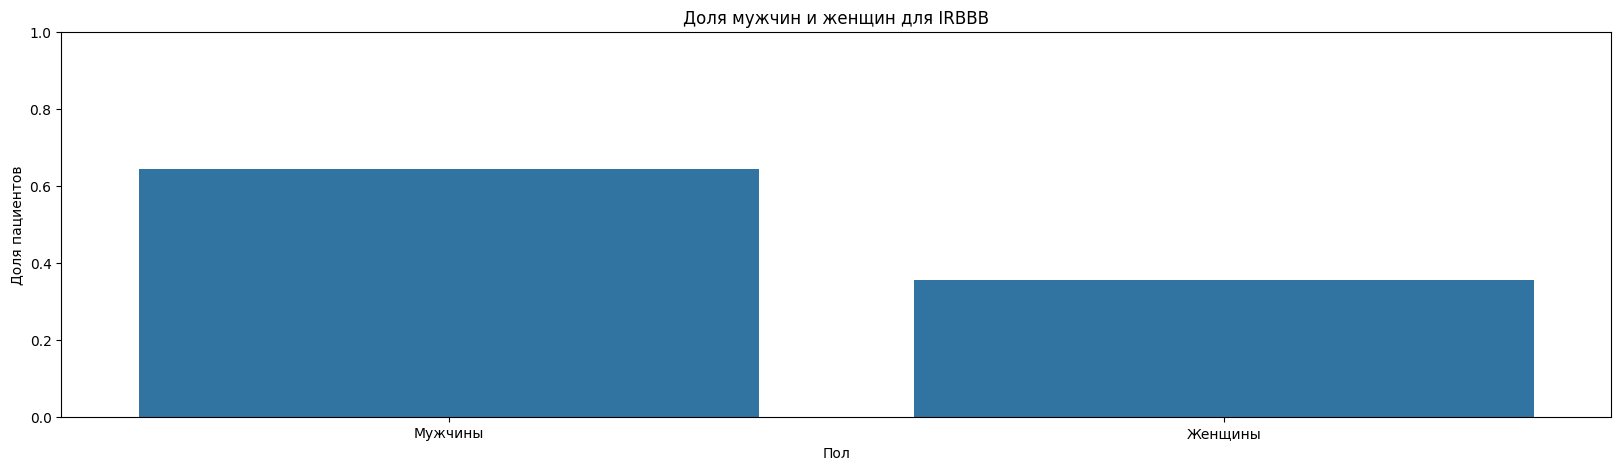

In [ ]:
total_men_count = df_exploded[df_exploded.gender == 'Male'].shape[0]
total_women_count = df_exploded[df_exploded.gender == 'Female'].shape[0]

for disease in top_20_diseases:
    df_to_plot = df_exploded[df_exploded.short_disease_name == disease]

    men_count = df_to_plot[(df_to_plot.gender == 'Male') & (df_exploded.short_disease_name == disease)].shape[0]
    women_count = df_to_plot[(df_to_plot.gender == 'Female') & (df_exploded.short_disease_name == disease)].shape[0]

    total_count = men_count + women_count

    men_ratio = men_count / total_count
    women_ratio = women_count / total_count

    plt.figure(figsize=(20, 5))
    sns.barplot(x=['Мужчины', 'Женщины'], y=[men_ratio, women_ratio])

    plt.ylim(0, 1)
    plt.ylabel('Доля пациентов')
    plt.xlabel('Пол')
    plt.title(f'Доля мужчин и женщин для {disease}')
    plt.show()


С помощью библиотеки для анализа сигналов выделим отобранные характеристики из каждого из 12 отведений.

Извлекаемые метрики можно поделить на три группы: <br>
1) **частотные (spectral)** <br>
энтропия (entropy) - spectral_entropy <br>
дисперсия (variance) - spectral_variation <br>
mel-частотные кепстральные коэффициенты (mfcc) - mfcc * <br>
уменьшение амплитуды (spectral decrease) - spectral_decrease <br>

2) **временные (temporal)** <br>
cреднее абсолютное отклонение (mean absolute difference) - mean_abs_diff <br>
cреднее значение разностей (mean difference) - mean_diff <br>

3) **статистические (statistical)** <br>
абсолютная энергия (absolute energy) - abs_energy <br>
энтропия (entropy) - entropy * <br>
коэффициент асимметрии (skewness) - skewness <br>
коэффициент эксцесса/островершинности (kurtosis) - kurtosis <br>

In [ ]:
#!pip install tsfel

In [ ]:
import tsfel as tsfel

In [ ]:
# spectral_entropy

df_exploded['one_spectral_entropy'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.spectral_entropy(x[0], fs=500))

df_exploded['two_spectral_entropy'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.spectral_entropy(x[1], fs=500))

df_exploded['three_spectral_entropy'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.spectral_entropy(x[2], fs=500))

df_exploded['aVR_spectral_entropy'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.spectral_entropy(x[3], fs=500))

df_exploded['aVL_spectral_entropy'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.spectral_entropy(x[4], fs=500))

df_exploded['aVF_spectral_entropy'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.spectral_entropy(x[5], fs=500))

df_exploded['V1_spectral_entropy'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.spectral_entropy(x[6], fs=500))

df_exploded['V2_spectral_entropy'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.spectral_entropy(x[7], fs=500))

df_exploded['V3_spectral_entropy'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.spectral_entropy(x[8], fs=500))

df_exploded['V4_spectral_entropy'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.spectral_entropy(x[9], fs=500))

df_exploded['V5_spectral_entropy'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.spectral_entropy(x[10], fs=500))

df_exploded['V6_spectral_entropy'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.spectral_entropy(x[11], fs=500))

# spectral_variation

df_exploded['one_spectral_variation'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.spectral_variation(x[0], fs=500))

df_exploded['two_spectral_variation'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.spectral_variation(x[1], fs=500))

df_exploded['three_spectral_variation'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.spectral_variation(x[2], fs=500))

df_exploded['aVR_spectral_variation'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.spectral_variation(x[3], fs=500))

df_exploded['aVL_spectral_variation'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.spectral_variation(x[4], fs=500))

df_exploded['aVF_spectral_variation'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.spectral_variation(x[5], fs=500))

df_exploded['V1_spectral_variation'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.spectral_variation(x[6], fs=500))

df_exploded['V2_spectral_variation'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.spectral_variation(x[7], fs=500))

df_exploded['V3_spectral_variation'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.spectral_variation(x[8], fs=500))

df_exploded['V4_spectral_variation'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.spectral_variation(x[9], fs=500))

df_exploded['V5_spectral_variation'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.spectral_variation(x[10], fs=500))

df_exploded['V6_spectral_variation'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.spectral_variation(x[11], fs=500))


# mfcc

df_exploded['one_mfcc'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.mfcc(x[0], fs=500))

df_exploded['two_mfcc'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.mfcc(x[1], fs=500))

df_exploded['three_mfcc'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.mfcc(x[2], fs=500))

df_exploded['aVR_mfcc'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.mfcc(x[3], fs=500))

df_exploded['aVL_mfcc'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.mfcc(x[4], fs=500))

df_exploded['aVF_mfcc'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.mfcc(x[5], fs=500))

df_exploded['V1_mfcc'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.mfcc(x[6], fs=500))

df_exploded['V2_mfcc'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.mfcc(x[7], fs=500))

df_exploded['V3_mfcc'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.mfcc(x[8], fs=500))

df_exploded['V4_mfcc'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.mfcc(x[9], fs=500))

df_exploded['V5_mfcc'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.mfcc(x[10], fs=500))

df_exploded['V6_mfcc'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.mfcc(x[11], fs=500))


# spectral_descrease

df_exploded['one_spectral_decrease'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.spectral_decrease(x[0], fs=500))

df_exploded['two_spectral_decrease'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.spectral_decrease(x[1], fs=500))

df_exploded['three_spectral_decrease'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.spectral_decrease(x[2], fs=500))

df_exploded['aVR_spectral_decrease'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.spectral_decrease(x[3], fs=500))

df_exploded['aVL_spectral_decrease'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.spectral_decrease(x[4], fs=500))

df_exploded['aVF_spectral_decrease'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.spectral_decrease(x[5], fs=500))

df_exploded['V1_spectral_decrease'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.spectral_decrease(x[6], fs=500))

df_exploded['V2_spectral_decrease'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.spectral_decrease(x[7], fs=500))

df_exploded['V3_spectral_decrease'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.spectral_decrease(x[8], fs=500))

df_exploded['V4_spectral_decrease'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.spectral_decrease(x[9], fs=500))

df_exploded['V5_spectral_decrease'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.spectral_decrease(x[10], fs=500))

df_exploded['V6_spectral_decrease'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.spectral_decrease(x[11], fs=500))


#  mean_abs_diff

df_exploded['one_mean_abs_diff'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.mean_abs_diff(x[0]))

df_exploded['two_mean_abs_diff'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.mean_abs_diff(x[1]))

df_exploded['three_mean_abs_diff'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.mean_abs_diff(x[2]))

df_exploded['aVR_mean_abs_diff'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.mean_abs_diff(x[3]))

df_exploded['aVL_mean_abs_diff'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.mean_abs_diff(x[4]))

df_exploded['aVF_mean_abs_diff'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.mean_abs_diff(x[5]))

df_exploded['V1_mean_abs_diff'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.mean_abs_diff(x[6]))

df_exploded['V2_mean_abs_diff'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.mean_abs_diff(x[7]))

df_exploded['V3_mean_abs_diff'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.mean_abs_diff(x[8]))

df_exploded['V4_mean_abs_diff'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.mean_abs_diff(x[9]))

df_exploded['V5_mean_abs_diff'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.mean_abs_diff(x[10]))

df_exploded['V6_mean_abs_diff'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.mean_abs_diff(x[11]))


# mean_diff

df_exploded['one_mean_diff'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.mean_diff(x[0]))

df_exploded['two_mean_diff'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.mean_diff(x[1]))

df_exploded['three_mean_diff'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.mean_diff(x[2]))

df_exploded['aVR_mean_diff'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.mean_diff(x[3]))

df_exploded['aVL_mean_diff'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.mean_diff(x[4]))

df_exploded['aVF_mean_diff'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.mean_diff(x[5]))

df_exploded['V1_mean_diff'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.mean_diff(x[6]))

df_exploded['V2_mean_diff'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.mean_diff(x[7]))

df_exploded['V3_mean_diff'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.mean_diff(x[8]))

df_exploded['V4_mean_diff'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.mean_diff(x[9]))

df_exploded['V5_mean_diff'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.mean_diff(x[10]))

df_exploded['V6_mean_diff'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.mean_diff(x[11]))


# abs_energy

df_exploded['one_abs_energy'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.abs_energy(x[0]))

df_exploded['two_abs_energy'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.abs_energy(x[1]))

df_exploded['three_abs_energy'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.abs_energy(x[2]))

df_exploded['aVR_abs_energy'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.abs_energy(x[3]))

df_exploded['aVL_abs_energy'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.abs_energy(x[4]))

df_exploded['aVF_abs_energy'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.abs_energy(x[5]))

df_exploded['V1_abs_energy'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.abs_energy(x[6]))

df_exploded['V2_abs_energy'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.abs_energy(x[7]))

df_exploded['V3_abs_energy'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.abs_energy(x[8]))

df_exploded['V4_abs_energy'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.abs_energy(x[9]))

df_exploded['V5_abs_energy'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.abs_energy(x[10]))

df_exploded['V6_abs_energy'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.abs_energy(x[11]))

# enthropy

df_exploded['one_enthropy'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.entropy(x[0]))

df_exploded['two_enthropy'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.entropy(x[1]))

df_exploded['three_enthropy'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.entropy(x[2]))

df_exploded['aVR_enthropy'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.entropy(x[3]))

df_exploded['aVL_enthropy'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.entropy(x[4]))

df_exploded['aVF_enthropy'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.entropy(x[5]))

df_exploded['V1_enthropy'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.entropy(x[6]))

df_exploded['V2_enthropy'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.entropy(x[7]))

df_exploded['V3_enthropy'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.entropy(x[8]))

df_exploded['V4_enthropy'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.entropy(x[9]))

df_exploded['V5_enthropy'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.entropy(x[10]))

df_exploded['V6_enthropy'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.entropy(x[11]))

# skewness

df_exploded['one_skewness'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.skewness(x[0]))

df_exploded['two_skewness'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.skewness(x[1]))

df_exploded['three_skewness'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.skewness(x[2]))

df_exploded['aVR_skewness'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.skewness(x[3]))

df_exploded['aVL_skewness'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.skewness(x[4]))

df_exploded['aVF_skewness'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.skewness(x[5]))

df_exploded['V1_skewness'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.skewness(x[6]))

df_exploded['V2_skewness'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.skewness(x[7]))

df_exploded['V3_skewness'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.skewness(x[8]))

df_exploded['V4_skewness'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.skewness(x[9]))

df_exploded['V5_skewness'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.skewness(x[10]))

df_exploded['V6_skewness'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.skewness(x[11]))


# kurtosis

df_exploded['one_kurtosis'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.kurtosis(x[0]))

df_exploded['two_kurtosis'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.kurtosis(x[1]))

df_exploded['three_kurtosis'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.kurtosis(x[2]))

df_exploded['aVR_kurtosis'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.kurtosis(x[3]))

df_exploded['aVL_kurtosis'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.kurtosis(x[4]))

df_exploded['aVF_kurtosis'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.kurtosis(x[5]))

df_exploded['V1_kurtosis'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.kurtosis(x[6]))

df_exploded['V2_kurtosis'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.kurtosis(x[7]))

df_exploded['V3_kurtosis'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.kurtosis(x[8]))

df_exploded['V4_kurtosis'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.kurtosis(x[9]))

df_exploded['V5_kurtosis'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.kurtosis(x[10]))

df_exploded['V6_kurtosis'] = df_exploded['signal'].apply(
    lambda x: tsfel.feature_extraction.features.kurtosis(x[11]))

<ipython-input-70-4df619e7dfb2>:307: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_exploded['V6_enthropy'] = df_exploded['signal'].apply(
<ipython-input-70-4df619e7dfb2>:312: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_exploded['one_skewness'] = df_exploded['signal'].apply(
<ipython-input-70-4df619e7dfb2>:315: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instea

In [ ]:
df_exploded.head()

,id,one,two,three,aVR,aVL,aVF,V1,V2,V3,...,three_kurtosis,aVR_kurtosis,aVL_kurtosis,aVF_kurtosis,V1_kurtosis,V2_kurtosis,V3_kurtosis,V4_kurtosis,V5_kurtosis,V6_kurtosis
0,E09826,53,39,-14,-46,34,12,-63,39,53,...,0.603832,4.229891,0.437643,1.515420,4.455373,8.565127,8.960794,1.992966,7.847901,9.826116
1,E09826,53,39,-14,-46,34,12,-63,39,53,...,0.603832,4.229891,0.437643,1.515420,4.455373,8.565127,8.960794,1.992966,7.847901,9.826116
2,E09826,53,39,-14,-46,34,12,-63,39,53,...,0.603832,4.229891,0.437643,1.515420,4.455373,8.565127,8.960794,1.992966,7.847901,9.826116
3,E09837,-39,-156,-117,97,39,-136,-19,19,-156,...,0.236699,2.782589,1.770129,0.392972,8.797798,14.848717,12.909421,8.873570,7.821621,3.677336
4,E09837,-39,-156,-117,97,39,-136,-19,19,-156,...,0.236699,2.782589,1.770129,0.392972,8.797798,14.848717,12.909421,8.873570,7.821621,3.677336


Построим матрицу корреляций для числовых переменных.

In [ ]:
corr_df = df_exploded.select_dtypes(include=['number']).corr()

corr_df

,one,two,three,aVR,aVL,aVF,V1,V2,V3,V4,...,three_kurtosis,aVR_kurtosis,aVL_kurtosis,aVF_kurtosis,V1_kurtosis,V2_kurtosis,V3_kurtosis,V4_kurtosis,V5_kurtosis,V6_kurtosis
one,1.000000,0.499709,-0.407642,-0.848015,0.826858,0.065115,-0.496129,-0.236577,-0.029151,0.244319,...,-0.009854,-0.004173,-0.004521,-0.010741,-0.003772,0.001952,-0.015402,-0.014456,-0.015323,-0.012636
two,0.499709,1.000000,0.587248,-0.882812,-0.073956,0.896889,-0.324124,-0.146235,0.149161,0.403925,...,-0.014488,-0.004995,-0.013125,-0.015831,-0.018290,-0.010434,-0.014393,-0.013102,-0.022590,-0.020194
three,-0.407642,0.587248,1.000000,-0.138241,-0.850614,0.884654,0.121965,0.067009,0.184556,0.197618,...,-0.006177,-0.001390,-0.009663,-0.006734,-0.015818,-0.012829,-0.000818,-0.000362,-0.009512,-0.009506
aVR,-0.848015,-0.882812,-0.138241,1.000000,-0.403139,-0.584055,0.467358,0.217784,-0.075458,-0.379625,...,0.014170,0.005241,0.010428,0.015454,0.013147,0.005288,0.017130,0.015758,0.022020,0.019127
aVL,0.826858,-0.073956,-0.850614,-0.403139,1.000000,-0.507363,-0.360900,-0.177584,-0.130541,0.018847,...,-0.001787,-0.001504,0.003437,-0.001976,0.007618,0.009034,-0.008303,-0.008024,-0.002912,-0.001389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V2_kurtosis,0.001952,-0.010434,-0.012829,0.005288,0.009034,-0.013010,0.015357,-0.011041,-0.008809,-0.008628,...,0.513788,0.394023,0.378277,0.591795,0.575109,1.000000,0.263770,0.288474,0.270202,0.240462
V3_kurtosis,-0.015402,-0.014393,-0.000818,0.017130,-0.008303,-0.008730,-0.026379,-0.006333,-0.043109,-0.009233,...,0.301682,0.304079,0.325359,0.293747,0.245386,0.263770,1.000000,0.435032,0.325574,0.277141
V4_kurtosis,-0.014456,-0.013102,-0.000362,0.015758,-0.008024,-0.007735,-0.014310,-0.009398,-0.009128,-0.013497,...,0.411857,0.610500,0.418860,0.465277,0.424541,0.288474,0.435032,1.000000,0.756371,0.588121
V5_kurtosis,-0.015323,-0.022590,-0.009512,0.022020,-0.002912,-0.018203,-0.010148,-0.015989,-0.013140,-0.015072,...,0.324063,0.613430,0.340804,0.387390,0.468334,0.270202,0.325574,0.756371,1.000000,0.807634


Слишком много числовых переменных. Корреляция между первыми значениями в отведениях может быть случайной. Оценивать такую объемную матрицу корреляций сложно.